# La quantità di alcol consumata influenza la felcitità di un paese? 

Il progetto si focalizza sull'analisi della relazione tra cosnumo di Alcol pro capite e il punteggio di felicità di un paese (valore stabilibilo dal World Happiness Report tramite sondaggi nei vari paesi del mondo).

Gli effetti dannosi del consumo di alcol sull’uomo sono stati indagati in maniera approfondita nel corso degli anni.
Contrariamente, in letteratura sono presenti poche ricerche sul legame tra felicità
e alcol, e perciò pochi studi empirici a sostengo di questa tesi. Se è vero che un
consumo eccessivo e prolungato nel tempo non porta nessun beneficio oggettivo
alla salute dell’uomo, non sono però stati presi in considerazione gli effetti sogget-
tivi (positivi o negativi) che un consumo ragionevole può generare.

## Import librerie

In [269]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import pylab

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from statsmodels.regression.mixed_linear_model import MixedLM
from statsmodels.tsa.api import VAR
from statsmodels.formula.api import ols

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf


## Creazione dataset

### Alcol Totale pro capite

Alcol pro capite ottenuto da [The Global Health Observatory](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/alcohol-recorded-per-capita-(15-)-consumption-(in-litres-of-pure-alcohol))

Tuttavia ci sono molte inforamzioni che non ci servono, quindi dopo aver individuato le informazioni rilevanti le estraiamo e creiamo un nuovo dataset.

In [270]:
#show all columns of dataframe
pd.set_option('display.max_columns', None)
data_alcohol = pd.read_csv('dataset/data_alcohol.csv')
data_alcohol

C:\Users\franc\AppData\Local\Temp\ipykernel_10652\1036070258.py:3: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  data_alcohol = pd.read_csv('dataset/data_alcohol.csv')


,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,IsLatestYear,Dim1 type,Dim1,Dim1ValueCode,Dim2 type,Dim2,Dim2ValueCode,Dim3 type,Dim3,Dim3ValueCode,DataSourceDimValueCode,DataSource,FactValueNumericPrefix,FactValueNumeric,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,SA_0000001400,"Alcohol, recorded per capita (15+) consumption...",numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2019,True,Beverage Types,Beer,SA_BEER,NaN,NaN,NaN,NaN,NaN,NaN,GISAHAFG,"(FAO) 1961-2015; (FAO, IWSR) 2016-2018",NaN,0.00,NaN,NaN,0.0,NaN,0.0,0 [0 – 0],NaN,NaN,EN,2022-06-12T22:00:00.000Z
1,SA_0000001400,"Alcohol, recorded per capita (15+) consumption...",numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2019,True,Beverage Types,Other alcoholic beverages,SA_OTHER_ALCOHOL,NaN,NaN,NaN,NaN,NaN,NaN,GISAHAFG,"(FAO) 1961-2015; (FAO, IWSR) 2016-2018",NaN,0.00,NaN,NaN,0.0,NaN,0.0,0 [0 – 0],NaN,NaN,EN,2022-06-12T22:00:00.000Z
2,SA_0000001400,"Alcohol, recorded per capita (15+) consumption...",numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2019,True,Beverage Types,Wine,SA_WINE,NaN,NaN,NaN,NaN,NaN,NaN,GISAHAFG,"(FAO) 1961-2015; (FAO, IWSR) 2016-2018",NaN,0.00,NaN,NaN,0.0,NaN,0.0,0 [0 – 0],NaN,NaN,EN,2022-06-12T22:00:00.000Z
3,SA_0000001400,"Alcohol, recorded per capita (15+) consumption...",numeric,AFR,Africa,Country,DZA,Algeria,Year,2019,True,Beverage Types,Other alcoholic beverages,SA_OTHER_ALCOHOL,NaN,NaN,NaN,NaN,NaN,NaN,GISAHDZA,"(WDT) 1961-1999; (FAO, GlobalData, OIV) 2000-2017",NaN,0.00,NaN,NaN,0.0,NaN,0.0,0 [0 – 0],NaN,NaN,EN,2022-06-12T22:00:00.000Z
4,SA_0000001400,"Alcohol, recorded per capita (15+) consumption...",numeric,EUR,Europe,Country,AND,Andorra,Year,2019,True,Beverage Types,Other alcoholic beverages,SA_OTHER_ALCOHOL,NaN,NaN,NaN,NaN,NaN,NaN,GISAHAND,avg of France and Spain consumption 2000-2018,NaN,0.00,NaN,NaN,0.0,NaN,0.0,0 [0 – 0],NaN,NaN,EN,2022-06-12T22:00:00.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47784,SA_0000001400,"Alcohol, recorded per capita (15+) consumption...",numeric,AMR,Americas,Country,USA,United States of America,Year,1960,False,Beverage Types,Spirits,SA_SPIRITS,NaN,NaN,NaN,NaN,NaN,NaN,GISAHUSA,(NIAAA) 1961-2017,NaN,3.26,NaN,NaN,NaN,NaN,NaN,3.26,NaN,NaN,EN,2018-05-10T22:00:00.000Z
47785,SA_0000001400,"Alcohol, recorded per capita (15+) consumption...",numeric,AMR,Americas,Country,USA,United States of America,Year,1960,False,Beverage Types,Beer,SA_BEER,NaN,NaN,NaN,NaN,NaN,NaN,GISAHUSA,(NIAAA) 1961-2017,NaN,3.75,NaN,NaN,NaN,NaN,NaN,3.75,NaN,NaN,EN,2018-05-10T22:00:00.000Z
47786,SA_0000001400,"Alcohol, recorded per capita (15+) consumption...",numeric,EUR,Europe,Country,AUT,Austria,Year,1960,False,Beverage Types,Beer,SA_BEER,NaN,NaN,NaN,NaN,NaN,NaN,GISAHAUT,(FAO) 1960-1962; (WDT) 1963-1999; (Anton Pro...,NaN,4.70,NaN,NaN,NaN,NaN,NaN,4.7,NaN,NaN,EN,2018-05-10T22:00:00.000Z
47787,SA_0000001400,"Alcohol, recorded per capita (15+) consumption...",numeric,AMR,Americas,Country,USA,United States of America,Year,1960,False,Beverage Types,All types,SA_TOTAL,NaN,NaN,NaN,NaN,NaN,NaN,GISAHUSA,(NIAAA) 1961-2017,NaN,7.83,NaN,NaN,NaN,NaN,NaN,7.83,NaN,NaN,EN,2018-05-10T22:00:00.000Z


In [271]:

data_alcohol=data_alcohol[["ParentLocation","Location","Period","Dim1","FactValueNumeric"]]
data_alcohol=data_alcohol[data_alcohol["Dim1"]=="All types"]
data_alcohol= data_alcohol[(data_alcohol["Period"]>2004) & (data_alcohol["Period"]<2020)]
data_alcohol=data_alcohol.sort_values(by=["Location","Period"])

#rename columns Period and FactValueNumeric
data_alcohol.rename(columns={"Location":"Entity","Period":"Year","FactValueNumeric":"Total_Alcohol"},inplace=True)
data_alcohol.drop(columns=["Dim1","ParentLocation"],inplace=True)
data_alcohol

,Entity,Year,Total_Alcohol
13325,Afghanistan,2005,0.016
12409,Afghanistan,2006,0.026
11441,Afghanistan,2007,0.018
10529,Afghanistan,2008,0.028
9543,Afghanistan,2009,0.010
...,...,...,...
4552,Zimbabwe,2015,3.840
3609,Zimbabwe,2016,3.760
2675,Zimbabwe,2017,3.820
1677,Zimbabwe,2018,3.100


In [272]:
data_alcohol=pd.read_csv("dataset/data_alcohol_clean.csv")
data_alcohol["Total_Alcohol"].describe()

count    2815.000000
mean        4.898353
std         3.898554
min         0.000000
25%         1.290000
50%         4.190000
75%         8.005000
max        17.870000
Name: Total_Alcohol, dtype: float64

### Happiness Score

Happiness Score ottenuto dal [World Happiness Report](https://worldhappiness.report/data/)

Il World Happiness Report è una pubblicazione del Sustainable Development Solutions Network, alimentata dai dati Gallup World Poll. Valuta il livello di felicità e benessere in diversi paesi del mondo, attraverso un valore di risposta da 0 a 10 alla domanda:
”Quanto sei soddisfatto della tua vita?” 

I dati sono presenti dal 2003 al 2021, ma per il nostro progetto ci focalizziamo sugli anni che vanno dal 2005 al 2020, visto che la forte presenza di dati mancanti per gli anni 2003,2004 e 2021.
Nel dataset riassuntivo disponibile sul sito del World Happiness Report, sono presenti anche dei dataset singoli per ogni anno, ed è stato utilizzato quello specifico del 2018 per sistemare un problema presente nel dataset riassuntivo che aveva quasi tutti valori mancanti per l'anno 2018.

Inoltre i paesi con il 50% di valori mancanti verranno eliminati dal dataset. Mentre quelli che hanno meno del 50% di valori mancanti verranno sostituiti con una tecnica di interpolazione lineare.

In [273]:
happiness=pd.read_csv("dataset/happiness-cantril-ladder.csv")
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                2381 non-null   object 
 1   Code                  2377 non-null   object 
 2   Year                  2381 non-null   int64  
 3   Cantril ladder score  2381 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 74.5+ KB


In [274]:
happiness=happiness.pivot_table(index="Entity",columns="Year",values="Cantril ladder score")
happiness=happiness.reset_index()
happiness=happiness.rename(columns={"Cantril Ladder score":"Happiness_Score"})


In [275]:
happiness.drop([2003,2004,2020,2021],axis=1,inplace=True)

In [276]:
happiness

Year,Entity,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,3.723590,4.401778,4.758381,3.831719,3.782938,3.572100,3.130896,3.982855,4.220169,2.661718,2.694303,2.375092,NaN,2.5229
1,Albania,4.634252,NaN,5.485470,5.268937,5.867422,5.510124,4.550648,4.813763,4.606651,4.511101,4.639548,5.004403,4.995318,5.364910,5.1174
2,Algeria,NaN,NaN,NaN,5.463567,5.317195,5.604596,NaN,6.354899,NaN,5.340854,5.248912,5.043086,4.744627,NaN,4.8871
3,Angola,NaN,NaN,NaN,NaN,5.589001,4.360250,3.937107,3.794838,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,6.073158,5.961034,6.424133,6.441067,6.775805,6.468387,6.582260,6.671114,6.697131,6.427221,6.039330,5.792797,6.085561,5.900567,5.9293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Venezuela,NaN,6.257771,7.188803,7.478455,6.579789,7.066577,6.552796,6.136096,5.568800,4.041115,5.070751,5.005663,5.080803,4.573830,4.8922
162,Vietnam,5.421688,5.480425,5.304265,5.295781,5.767345,5.534570,5.022699,5.084923,5.076315,5.062267,5.175279,5.295547,5.467451,NaN,5.4108
163,Yemen,4.477133,NaN,4.809259,4.350313,3.746256,4.060601,4.217678,3.967958,2.982674,3.825631,3.253560,3.057514,4.196913,NaN,3.6579
164,Zambia,3.998293,4.730263,5.260361,NaN,4.999114,5.013375,5.243996,4.345837,4.843164,4.347544,3.932777,4.041488,3.306797,4.837992,4.0734


In [277]:
#drop the row with 3 or more NaN values
happiness=happiness.dropna(thresh=9)

In [278]:
happiness

Year,Entity,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,3.723590,4.401778,4.758381,3.831719,3.782938,3.572100,3.130896,3.982855,4.220169,2.661718,2.694303,2.375092,NaN,2.5229
1,Albania,4.634252,NaN,5.485470,5.268937,5.867422,5.510124,4.550648,4.813763,4.606651,4.511101,4.639548,5.004403,4.995318,5.364910,5.1174
2,Algeria,NaN,NaN,NaN,5.463567,5.317195,5.604596,NaN,6.354899,NaN,5.340854,5.248912,5.043086,4.744627,NaN,4.8871
4,Argentina,6.073158,5.961034,6.424133,6.441067,6.775805,6.468387,6.582260,6.671114,6.697131,6.427221,6.039330,5.792797,6.085561,5.900567,5.9293
5,Armenia,4.881515,4.651972,4.177582,4.367811,4.260491,4.319712,4.277191,4.453083,4.348319,4.325472,4.287736,5.062449,5.488087,NaN,5.2826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Venezuela,NaN,6.257771,7.188803,7.478455,6.579789,7.066577,6.552796,6.136096,5.568800,4.041115,5.070751,5.005663,5.080803,4.573830,4.8922
162,Vietnam,5.421688,5.480425,5.304265,5.295781,5.767345,5.534570,5.022699,5.084923,5.076315,5.062267,5.175279,5.295547,5.467451,NaN,5.4108
163,Yemen,4.477133,NaN,4.809259,4.350313,3.746256,4.060601,4.217678,3.967958,2.982674,3.825631,3.253560,3.057514,4.196913,NaN,3.6579
164,Zambia,3.998293,4.730263,5.260361,NaN,4.999114,5.013375,5.243996,4.345837,4.843164,4.347544,3.932777,4.041488,3.306797,4.837992,4.0734


In [279]:
#utilizzare il dataset del 2018 per sistemare i valori del 2018 e ottenere la regione di appartenenza di ogni paese
happy2020=pd.read_excel("dataset/WHR20_Data.xls")
happy2020=happy2020.rename(columns={"Country name":"Entity","Ladder score":2018})
happy2020

,Entity,Regional indicator,2018
0,Finland,Western Europe,7.8087
1,Denmark,Western Europe,7.6456
2,Switzerland,Western Europe,7.5599
3,Iceland,Western Europe,7.5045
4,Norway,Western Europe,7.4880
...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759
149,Rwanda,Sub-Saharan Africa,3.3123
150,Zimbabwe,Sub-Saharan Africa,3.2992
151,South Sudan,Sub-Saharan Africa,2.8166


In [280]:
happiness.drop([2018],axis=1,inplace=True)
df=happiness.merge(happy2020,on="Entity",how="left")

C:\Users\franc\AppData\Local\Temp\ipykernel_10652\1236489743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happiness.drop([2018],axis=1,inplace=True)


In [281]:
df=df[['Entity','Regional indicator', 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,2013,2014,2015,2016,2017,2018,2019]]
df.head()

,Entity,Regional indicator,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,South Asia,NaN,3.723590,4.401778,4.758381,3.831719,3.782938,3.572100,3.130896,3.982855,4.220169,2.661718,2.694303,2.375092,2.5669,2.5229
1,Albania,Central and Eastern Europe,4.634252,NaN,5.485470,5.268937,5.867422,5.510124,4.550648,4.813763,4.606651,4.511101,4.639548,5.004403,4.995318,4.8827,5.1174
2,Algeria,Middle East and North Africa,NaN,NaN,NaN,5.463567,5.317195,5.604596,NaN,6.354899,NaN,5.340854,5.248912,5.043086,4.744627,5.0051,4.8871
3,Argentina,Latin America and Caribbean,6.073158,5.961034,6.424133,6.441067,6.775805,6.468387,6.582260,6.671114,6.697131,6.427221,6.039330,5.792797,6.085561,5.9747,5.9293
4,Armenia,Commonwealth of Independent States,4.881515,4.651972,4.177582,4.367811,4.260491,4.319712,4.277191,4.453083,4.348319,4.325472,4.287736,5.062449,5.488087,4.6768,5.2826


In [282]:
#Interpolazione dei valori mancanti
df[[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,2013,2014,2015,2016,2017,2018,2019]]=df[[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,2013,2014,2015,2016,2017,2018,2019]].interpolate(method='index',limit_direction='both',axis=1)

In [283]:
df=df.melt(id_vars=['Entity','Regional indicator'],var_name='Year',value_name='Happiness_Score')
df=df.sort_values(by=['Entity','Year']).reset_index(drop=True)
df

,Entity,Regional indicator,Year,Happiness_Score
0,Afghanistan,South Asia,2005,3.723590
1,Afghanistan,South Asia,2006,3.723590
2,Afghanistan,South Asia,2007,4.401778
3,Afghanistan,South Asia,2008,4.758381
4,Afghanistan,South Asia,2009,3.831719
...,...,...,...,...
2110,Zimbabwe,Sub-Saharan Africa,2015,3.638300
2111,Zimbabwe,Sub-Saharan Africa,2016,3.616480
2112,Zimbabwe,Sub-Saharan Africa,2017,2.693523
2113,Zimbabwe,Sub-Saharan Africa,2018,3.299200


### Consumo di Alcol diviso per tipologia di bevanda

Consumo di Alcol diviso per tipologia di bevanda ottenuto da [Our World in Data](https://ourworldindata.org/alcohol-consumption#global-beer-consumption)

In [284]:
beer=pd.read_csv("dataset/beer-consumption-per-person.csv")
wine=pd.read_csv("dataset/wine-consumption-per-person.csv")
spirit=pd.read_csv("dataset/spirits-consumption-per-person.csv")


In [285]:
df=df.merge(beer,on=['Entity','Year'],how="left").drop(['Code'],axis=1)
df=df.merge(wine,on=['Entity','Year'],how="left").drop(['Code'],axis=1)
df=df.merge(spirit,on=['Entity','Year'],how="left").drop(['Code'],axis=1)


In [286]:
df

,Entity,Regional indicator,Year,Happiness_Score,Beer,Wine,Spirits
0,Afghanistan,South Asia,2005,3.723590,0.00934,0.00084,0.00605
1,Afghanistan,South Asia,2006,3.723590,0.01147,0.00786,0.00685
2,Afghanistan,South Asia,2007,4.401778,0.00713,0.00887,0.00202
3,Afghanistan,South Asia,2008,4.758381,0.00857,0.00089,0.01809
4,Afghanistan,South Asia,2009,3.831719,0.00972,0.00000,0.00000
...,...,...,...,...,...,...,...
2110,Zimbabwe,Sub-Saharan Africa,2015,3.638300,1.93000,0.06000,0.36000
2111,Zimbabwe,Sub-Saharan Africa,2016,3.616480,1.93000,0.05000,0.35000
2112,Zimbabwe,Sub-Saharan Africa,2017,2.693523,1.93000,0.05000,0.39000
2113,Zimbabwe,Sub-Saharan Africa,2018,3.299200,1.20000,0.04000,0.39000


### GDP per capita

Dati ottenuti da [The World Bank](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD)

In [287]:
gdp=pd.read_excel("dataset/GDP_per_capita(The_World_Bank).xlsx")
gdp

,Country Name,2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Afghanistan,255.05512,274.000486,375.078128,387.849174,443.845151,554.5952,621.912311,663.141053,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664
1,Albania,2673.786584,2972.742924,3595.038057,4370.539925,4114.134899,4094.348386,4437.142612,4247.630047,4413.062005,4578.633208,3952.802538,4124.05539,4531.019374,5287.663694,5396.215864
2,Algeria,3131.328532,3500.135413,3971.803488,4946.564017,3898.4797,4495.920448,5473.28055,5610.730894,5519.777576,5516.230604,4197.421361,3967.199451,4134.93672,4171.795011,4022.150184
3,American Samoa,8733.014287,8673.927195,9187.166344,10019.502245,12191.597731,10446.863206,10495.304732,11920.06109,12038.871592,12313.997357,13101.541816,13300.824611,12372.884783,13195.9359,13672.576657
4,Andorra,39584.915747,43086.499827,50565.456481,53719.421267,49753.6906,48238.466096,51429.19192,44904.580043,44750.43568,45682.246231,38885.376014,39932.164487,40632.484393,42903.443579,41327.502031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Sub-Saharan Africa,1070.124334,1231.150258,1387.79265,1530.516252,1432.118632,1656.057199,1818.172453,1837.557545,1900.194194,1931.648032,1675.486575,1524.82775,1609.900105,1631.593697,1607.921605
262,Sub-Saharan Africa (excluding high income),1069.036128,1229.987696,1386.659219,1529.514503,1431.274884,1655.124131,1817.170157,1836.592815,1898.98258,1930.414065,1674.237701,1523.527264,1608.564847,1630.238971,1606.558195
263,Sub-Saharan Africa (IDA & IBRD countries),1070.124334,1231.150258,1387.79265,1530.516252,1432.118632,1656.057199,1818.172453,1837.557545,1900.194194,1931.648032,1675.486575,1524.82775,1609.900105,1631.593697,1607.921605
264,Upper middle income,3089.286242,3644.575186,4485.514951,5433.983363,5196.219179,6290.110099,7546.03031,8021.73367,8538.428766,8730.059934,8132.28571,8025.2348,8820.949493,9435.780828,9534.005113


In [288]:
gdp = gdp.rename(columns=lambda x: x[:4])
gdp.rename(columns={"Coun":'Entity'}, inplace=True)
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Entity  266 non-null    object
 1   2005    266 non-null    object
 2   2006    266 non-null    object
 3   2007    266 non-null    object
 4   2008    266 non-null    object
 5   2009    266 non-null    object
 6   2010    266 non-null    object
 7   2011    266 non-null    object
 8   2012    266 non-null    object
 9   2013    266 non-null    object
 10  2014    266 non-null    object
 11  2015    266 non-null    object
 12  2016    266 non-null    object
 13  2017    266 non-null    object
 14  2018    266 non-null    object
 15  2019    266 non-null    object
dtypes: object(16)
memory usage: 33.4+ KB


In [289]:
gdp=gdp.melt(id_vars=['Entity'],var_name='Year',value_name='GDP_per_capita')
gdp=gdp.sort_values(by=['Entity','Year']).reset_index(drop=True)
gdp

,Entity,Year,GDP_per_capita
0,Afghanistan,2005,255.05512
1,Afghanistan,2006,274.000486
2,Afghanistan,2007,375.078128
3,Afghanistan,2008,387.849174
4,Afghanistan,2009,443.845151
...,...,...,...
3985,Zimbabwe,2015,1410.329174
3986,Zimbabwe,2016,1421.787789
3987,Zimbabwe,2017,1192.107012
3988,Zimbabwe,2018,2269.177012


In [290]:
#convert the year column to float
gdp["Year"]=gdp["Year"].astype(float)
df=df.merge(gdp,on=['Entity','Year'],how="left")


In [291]:
df

,Entity,Regional indicator,Year,Happiness_Score,Beer,Wine,Spirits,GDP_per_capita
0,Afghanistan,South Asia,2005,3.723590,0.00934,0.00084,0.00605,255.05512
1,Afghanistan,South Asia,2006,3.723590,0.01147,0.00786,0.00685,274.000486
2,Afghanistan,South Asia,2007,4.401778,0.00713,0.00887,0.00202,375.078128
3,Afghanistan,South Asia,2008,4.758381,0.00857,0.00089,0.01809,387.849174
4,Afghanistan,South Asia,2009,3.831719,0.00972,0.00000,0.00000,443.845151
...,...,...,...,...,...,...,...,...
2110,Zimbabwe,Sub-Saharan Africa,2015,3.638300,1.93000,0.06000,0.36000,1410.329174
2111,Zimbabwe,Sub-Saharan Africa,2016,3.616480,1.93000,0.05000,0.35000,1421.787789
2112,Zimbabwe,Sub-Saharan Africa,2017,2.693523,1.93000,0.05000,0.39000,1192.107012
2113,Zimbabwe,Sub-Saharan Africa,2018,3.299200,1.20000,0.04000,0.39000,2269.177012


### Human Development Index

Dati ottenuti da [The Human Development Reports](https://hdr.undp.org/data-center/human-development-index#/indicies/HDI). 

Questo indicatore viene utilizzato per valutare il livello di sviluppo umano e il benessere della popolazione nei diversi Paesi del mondo. Il calcolo dell’HDI combina i dati relativi a livello di istruzione, aspettativa di vita alla nascita, reddito nazionale lordo pro capite producendo un punteggio che varia tra 0 e 1

In [292]:
comp_index=pd.read_csv("dataset/HDR21-22_Composite_indices_complete_time_series.csv")
comp_index.head()

,iso3,country,hdicode,region,hdi_rank_2021,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,hdi_1995,hdi_1996,hdi_1997,hdi_1998,hdi_1999,hdi_2000,hdi_2001,hdi_2002,hdi_2003,hdi_2004,hdi_2005,hdi_2006,hdi_2007,hdi_2008,hdi_2009,hdi_2010,hdi_2011,hdi_2012,hdi_2013,hdi_2014,hdi_2015,hdi_2016,hdi_2017,hdi_2018,hdi_2019,hdi_2020,hdi_2021,le_1990,le_1991,le_1992,le_1993,le_1994,le_1995,le_1996,le_1997,le_1998,le_1999,le_2000,le_2001,le_2002,le_2003,le_2004,le_2005,le_2006,le_2007,le_2008,le_2009,le_2010,le_2011,le_2012,le_2013,le_2014,le_2015,le_2016,le_2017,le_2018,le_2019,le_2020,le_2021,eys_1990,eys_1991,eys_1992,eys_1993,eys_1994,eys_1995,eys_1996,eys_1997,eys_1998,eys_1999,eys_2000,eys_2001,eys_2002,eys_2003,eys_2004,eys_2005,eys_2006,eys_2007,eys_2008,eys_2009,eys_2010,eys_2011,eys_2012,eys_2013,eys_2014,eys_2015,eys_2016,eys_2017,eys_2018,eys_2019,eys_2020,eys_2021,mys_1990,mys_1991,mys_1992,mys_1993,mys_1994,mys_1995,mys_1996,mys_1997,mys_1998,mys_1999,mys_2000,mys_2001,mys_2002,mys_2003,mys_2004,mys_2005,mys_2006,mys_2007,mys_2008,mys_2009,mys_2010,mys_2011,mys_2012,mys_2013,mys_2014,mys_2015,mys_2016,mys_2017,mys_2018,mys_2019,mys_2020,mys_2021,gnipc_1990,gnipc_1991,gnipc_1992,gnipc_1993,gnipc_1994,gnipc_1995,gnipc_1996,gnipc_1997,gnipc_1998,gnipc_1999,gnipc_2000,gnipc_2001,gnipc_2002,gnipc_2003,gnipc_2004,gnipc_2005,gnipc_2006,gnipc_2007,gnipc_2008,gnipc_2009,gnipc_2010,gnipc_2011,gnipc_2012,gnipc_2013,gnipc_2014,gnipc_2015,gnipc_2016,gnipc_2017,gnipc_2018,gnipc_2019,gnipc_2020,gnipc_2021,gdi_group_2021,gdi_1990,gdi_1991,gdi_1992,gdi_1993,gdi_1994,gdi_1995,gdi_1996,gdi_1997,gdi_1998,gdi_1999,gdi_2000,gdi_2001,gdi_2002,gdi_2003,gdi_2004,gdi_2005,gdi_2006,gdi_2007,gdi_2008,gdi_2009,gdi_2010,gdi_2011,gdi_2012,gdi_2013,gdi_2014,gdi_2015,gdi_2016,gdi_2017,gdi_2018,gdi_2019,gdi_2020,gdi_2021,hdi_f_1990,hdi_f_1991,hdi_f_1992,hdi_f_1993,hdi_f_1994,hdi_f_1995,hdi_f_1996,hdi_f_1997,hdi_f_1998,hdi_f_1999,hdi_f_2000,hdi_f_2001,hdi_f_2002,hdi_f_2003,hdi_f_2004,hdi_f_2005,hdi_f_2006,hdi_f_2007,hdi_f_2008,hdi_f_2009,hdi_f_2010,hdi_f_2011,hdi_f_2012,hdi_f_2013,hdi_f_2014,hdi_f_2015,hdi_f_2016,hdi_f_2017,hdi_f_2018,hdi_f_2019,hdi_f_2020,hdi_f_2021,le_f_1990,le_f_1991,le_f_1992,le_f_1993,le_f_1994,le_f_1995,le_f_1996,le_f_1997,le_f_1998,le_f_1999,le_f_2000,le_f_2001,le_f_2002,le_f_2003,le_f_2004,le_f_2005,le_f_2006,le_f_2007,le_f_2008,le_f_2009,le_f_2010,le_f_2011,le_f_2012,le_f_2013,le_f_2014,le_f_2015,le_f_2016,le_f_2017,le_f_2018,le_f_2019,le_f_2020,le_f_2021,eys_f_1990,eys_f_1991,eys_f_1992,eys_f_1993,eys_f_1994,eys_f_1995,eys_f_1996,eys_f_1997,eys_f_1998,eys_f_1999,eys_f_2000,eys_f_2001,eys_f_2002,eys_f_2003,eys_f_2004,eys_f_2005,eys_f_2006,eys_f_2007,eys_f_2008,eys_f_2009,eys_f_2010,eys_f_2011,eys_f_2012,eys_f_2013,eys_f_2014,eys_f_2015,eys_f_2016,eys_f_2017,eys_f_2018,eys_f_2019,eys_f_2020,eys_f_2021,mys_f_1990,mys_f_1991,mys_f_1992,mys_f_1993,mys_f_1994,mys_f_1995,mys_f_1996,mys_f_1997,mys_f_1998,mys_f_1999,mys_f_2000,mys_f_2001,mys_f_2002,mys_f_2003,mys_f_2004,mys_f_2005,mys_f_2006,mys_f_2007,mys_f_2008,mys_f_2009,mys_f_2010,mys_f_2011,mys_f_2012,mys_f_2013,mys_f_2014,mys_f_2015,mys_f_2016,mys_f_2017,mys_f_2018,mys_f_2019,mys_f_2020,mys_f_2021,gni_pc_f_1990,gni_pc_f_1991,gni_pc_f_1992,gni_pc_f_1993,gni_pc_f_1994,gni_pc_f_1995,gni_pc_f_1996,gni_pc_f_1997,gni_pc_f_1998,gni_pc_f_1999,gni_pc_f_2000,gni_pc_f_2001,gni_pc_f_2002,gni_pc_f_2003,gni_pc_f_2004,gni_pc_f_2005,gni_pc_f_2006,gni_pc_f_2007,gni_pc_f_2008,gni_pc_f_2009,gni_pc_f_2010,gni_pc_f_2011,gni_pc_f_2012,gni_pc_f_2013,gni_pc_f_2014,gni_pc_f_2015,gni_pc_f_2016,gni_pc_f_2017,gni_pc_f_2018,gni_pc_f_2019,gni_pc_f_2020,gni_pc_f_2021,hdi_m_1990,hdi_m_1991,hdi_m_1992,hdi_m_1993,hdi_m_1994,hdi_m_1995,hdi_m_1996,hdi_m_1997,hdi_m_1998,hdi_m_1999,hdi_m_2000,hdi_m_2001,hdi_m_2002,hdi_m_2003,hdi_m_2004,hdi_m_2005,hdi_m_2006,hdi_m_2007,hdi_m_2008,hdi_m_2009,hdi_m_2010,hdi_m_2011,hdi_m_2012,hdi_m_2013,hdi_m_2014,hdi_m_2015,hdi_m_2016,hdi_m_2017,hdi_m_2018,hdi_m_2019,hdi_m_2020,hdi_m_2021,le_m_1

In [293]:
comp_index=comp_index[["country","hdicode","hdi_2005","hdi_2006","hdi_2007","hdi_2008","hdi_2009","hdi_2010","hdi_2011","hdi_2012","hdi_2013","hdi_2014","hdi_2015","hdi_2016","hdi_2017","hdi_2018","hdi_2019"]]
comp_index.head()

,country,hdicode,hdi_2005,hdi_2006,hdi_2007,hdi_2008,hdi_2009,hdi_2010,hdi_2011,hdi_2012,hdi_2013,hdi_2014,hdi_2015,hdi_2016,hdi_2017,hdi_2018,hdi_2019
0,Afghanistan,Low,0.400,0.409,0.424,0.430,0.440,0.448,0.456,0.466,0.474,0.479,0.478,0.481,0.482,0.483,0.488
1,Angola,Medium,0.447,0.459,0.475,0.486,0.500,0.510,0.526,0.541,0.552,0.563,0.582,0.596,0.597,0.595,0.595
2,Albania,High,0.711,0.718,0.730,0.736,0.741,0.754,0.766,0.778,0.785,0.792,0.795,0.798,0.802,0.806,0.810
3,Andorra,Very High,0.833,0.848,0.847,0.850,0.848,0.848,0.849,0.869,0.864,0.871,0.867,0.871,0.868,0.872,0.873
4,United Arab Emirates,Very High,0.822,0.827,0.831,0.834,0.833,0.835,0.840,0.846,0.852,0.859,0.865,0.870,0.897,0.909,0.920


In [294]:
comp_index = comp_index.rename(columns=lambda x: x[4:])
comp_index.rename(columns={"try":'Entity'}, inplace=True)
comp_index.rename(columns={"ode":'hdi_code'}, inplace=True)

In [295]:
comp_index=comp_index.melt(id_vars=['Entity','hdi_code'],var_name='Year',value_name='HDI')
comp_index=comp_index.sort_values(by=['Entity','Year']).reset_index(drop=True)
comp_index

,Entity,hdi_code,Year,HDI
0,Afghanistan,Low,2005,0.400
1,Afghanistan,Low,2006,0.409
2,Afghanistan,Low,2007,0.424
3,Afghanistan,Low,2008,0.430
4,Afghanistan,Low,2009,0.440
...,...,...,...,...
3085,Zimbabwe,Medium,2015,0.582
3086,Zimbabwe,Medium,2016,0.588
3087,Zimbabwe,Medium,2017,0.594
3088,Zimbabwe,Medium,2018,0.602


In [296]:
comp_index["Year"]=comp_index["Year"].astype(float)

In [297]:
df=df.merge(comp_index,on=['Entity','Year'],how="left")
df

,Entity,Regional indicator,Year,Happiness_Score,Beer,Wine,Spirits,GDP_per_capita,hdi_code,HDI
0,Afghanistan,South Asia,2005,3.723590,0.00934,0.00084,0.00605,255.05512,Low,0.400
1,Afghanistan,South Asia,2006,3.723590,0.01147,0.00786,0.00685,274.000486,Low,0.409
2,Afghanistan,South Asia,2007,4.401778,0.00713,0.00887,0.00202,375.078128,Low,0.424
3,Afghanistan,South Asia,2008,4.758381,0.00857,0.00089,0.01809,387.849174,Low,0.430
4,Afghanistan,South Asia,2009,3.831719,0.00972,0.00000,0.00000,443.845151,Low,0.440
...,...,...,...,...,...,...,...,...,...,...
2110,Zimbabwe,Sub-Saharan Africa,2015,3.638300,1.93000,0.06000,0.36000,1410.329174,Medium,0.582
2111,Zimbabwe,Sub-Saharan Africa,2016,3.616480,1.93000,0.05000,0.35000,1421.787789,Medium,0.588
2112,Zimbabwe,Sub-Saharan Africa,2017,2.693523,1.93000,0.05000,0.39000,1192.107012,Medium,0.594
2113,Zimbabwe,Sub-Saharan Africa,2018,3.299200,1.20000,0.04000,0.39000,2269.177012,Medium,0.602


In [298]:
#show all the entity with nan value
df[df.isnull().sum(axis=1)>=1]["Entity"].unique()


array(['Hong Kong', 'Kosovo', 'Northern Cyprus', 'Palestine', 'Taiwan'],
      dtype=object)

In [299]:
#drop the row with nan value
df=df.dropna()
df=df.rename(columns={"Regional indicator":'Region'})
df

,Entity,Region,Year,Happiness_Score,Beer,Wine,Spirits,GDP_per_capita,hdi_code,HDI
0,Afghanistan,South Asia,2005,3.723590,0.00934,0.00084,0.00605,255.05512,Low,0.400
1,Afghanistan,South Asia,2006,3.723590,0.01147,0.00786,0.00685,274.000486,Low,0.409
2,Afghanistan,South Asia,2007,4.401778,0.00713,0.00887,0.00202,375.078128,Low,0.424
3,Afghanistan,South Asia,2008,4.758381,0.00857,0.00089,0.01809,387.849174,Low,0.430
4,Afghanistan,South Asia,2009,3.831719,0.00972,0.00000,0.00000,443.845151,Low,0.440
...,...,...,...,...,...,...,...,...,...,...
2110,Zimbabwe,Sub-Saharan Africa,2015,3.638300,1.93000,0.06000,0.36000,1410.329174,Medium,0.582
2111,Zimbabwe,Sub-Saharan Africa,2016,3.616480,1.93000,0.05000,0.35000,1421.787789,Medium,0.588
2112,Zimbabwe,Sub-Saharan Africa,2017,2.693523,1.93000,0.05000,0.39000,1192.107012,Medium,0.594
2113,Zimbabwe,Sub-Saharan Africa,2018,3.299200,1.20000,0.04000,0.39000,2269.177012,Medium,0.602


## Final Dataset

Con i dati ottenuti dai vari dataset, creiamo un dataset finale che contiene tutte le informazioni che ci servono per il progetto. Quindi viene convertito il GDP per capita in log-lin GDP per capita per catturare meglio la relazione tra GDP e Happiness Score, dato la natura esponeziale del GDP.

Infine vengono modificati i nomi di alcuni paesi per risolvere problemi di differenti nomuncalture tra i vari dataset.

In [300]:
df["GDP_per_capita"]=np.log(df["GDP_per_capita"].astype(float))

In [301]:
#change the entity of Bolivia (Plurinational State of) to Bolivia
data_alcohol["Entity"]=data_alcohol["Entity"].replace("Bolivia (Plurinational State of)","Bolivia")
data_alcohol["Entity"]=data_alcohol["Entity"].replace("Viet Nam","VietNam")
data_alcohol["Entity"]=data_alcohol["Entity"].replace("Democratic Republic of the Congo","Democratic Republic of Congo")

In [302]:
data_alcohol[data_alcohol["Entity"]=="CÃ´te dâ€™Ivoire"]

,Entity,Year,Total_Alcohol


In [303]:
df=df.merge(data_alcohol,on=['Entity','Year'],how="left")
df

,Entity,Region,Year,Happiness_Score,Beer,Wine,Spirits,GDP_per_capita,hdi_code,HDI,Total_Alcohol
0,Afghanistan,South Asia,2005,3.723590,0.00934,0.00084,0.00605,5.541480,Low,0.400,0.016
1,Afghanistan,South Asia,2006,3.723590,0.01147,0.00786,0.00685,5.613130,Low,0.409,0.026
2,Afghanistan,South Asia,2007,4.401778,0.00713,0.00887,0.00202,5.927134,Low,0.424,0.018
3,Afghanistan,South Asia,2008,4.758381,0.00857,0.00089,0.01809,5.960617,Low,0.430,0.028
4,Afghanistan,South Asia,2009,3.831719,0.00972,0.00000,0.00000,6.095476,Low,0.440,0.010
...,...,...,...,...,...,...,...,...,...,...,...
2035,Zimbabwe,Sub-Saharan Africa,2015,3.638300,1.93000,0.06000,0.36000,7.251578,Medium,0.582,3.840
2036,Zimbabwe,Sub-Saharan Africa,2016,3.616480,1.93000,0.05000,0.35000,7.259670,Medium,0.588,3.760
2037,Zimbabwe,Sub-Saharan Africa,2017,2.693523,1.93000,0.05000,0.39000,7.083478,Medium,0.594,3.820
2038,Zimbabwe,Sub-Saharan Africa,2018,3.299200,1.20000,0.04000,0.39000,7.727172,Medium,0.602,3.100


In [304]:
df.to_csv("dataset/final_df.csv",index=False)

## Analisi Esplorativa

In [305]:
corrmat=df[["Happiness_Score","Beer","Wine","Spirits","Total_Alcohol","GDP_per_capita","HDI"]].corr()

<Axes: >

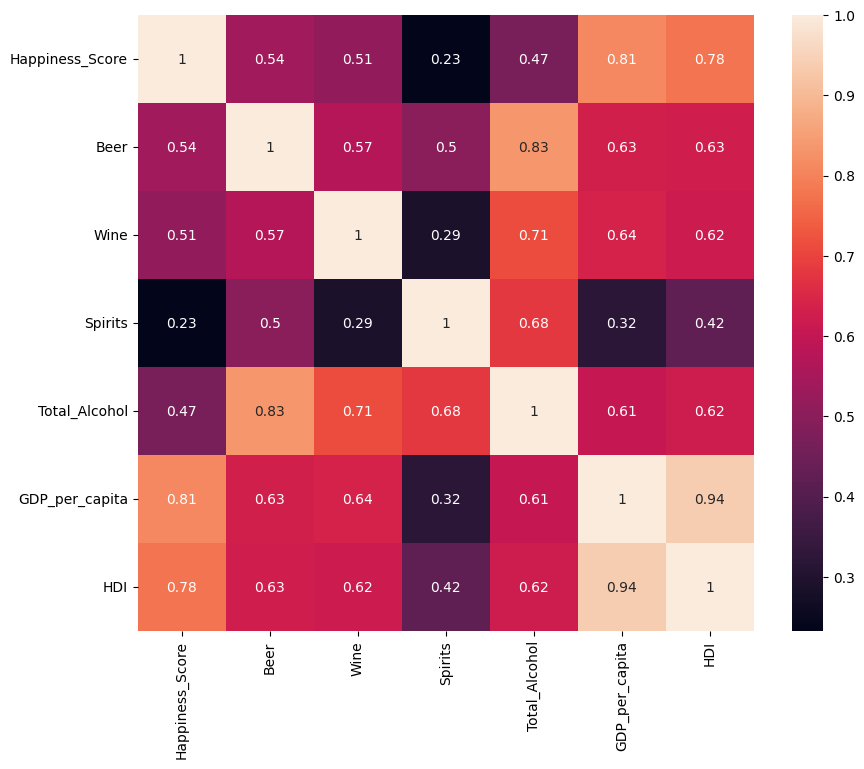

In [306]:
# set the figure size to default values
plt.rcParams['figure.figsize'] = (10, 8)
f, ax = plt.subplots()
sns.heatmap(corrmat, square=True, annot = True)

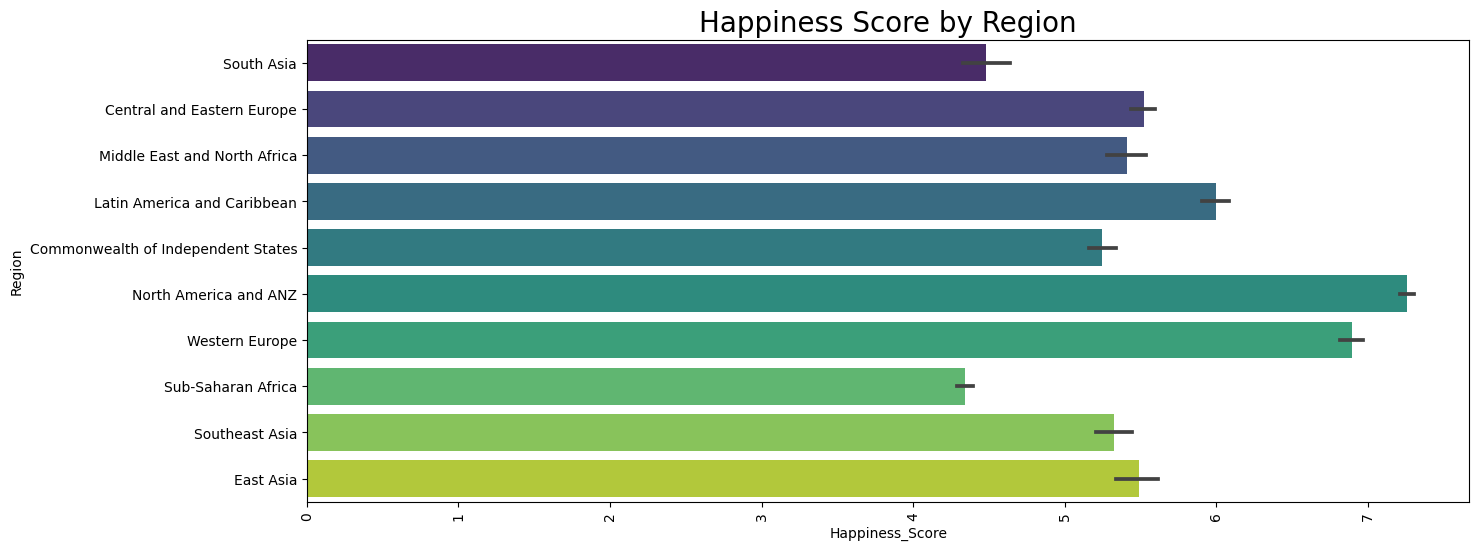

In [307]:
plt.figure(figsize = (15,6))
sns.barplot(x ='Happiness_Score',y= 'Region',data = df, palette = 'viridis')
plt.title('Happiness Score by Region', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

C:\Users\franc\AppData\Local\Temp\ipykernel_10652\460502257.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Happiness_Score'], color='r', shade=True, label='HDI')


Text(0.5, 1.0, 'Density Plot of the Happiness_Score')

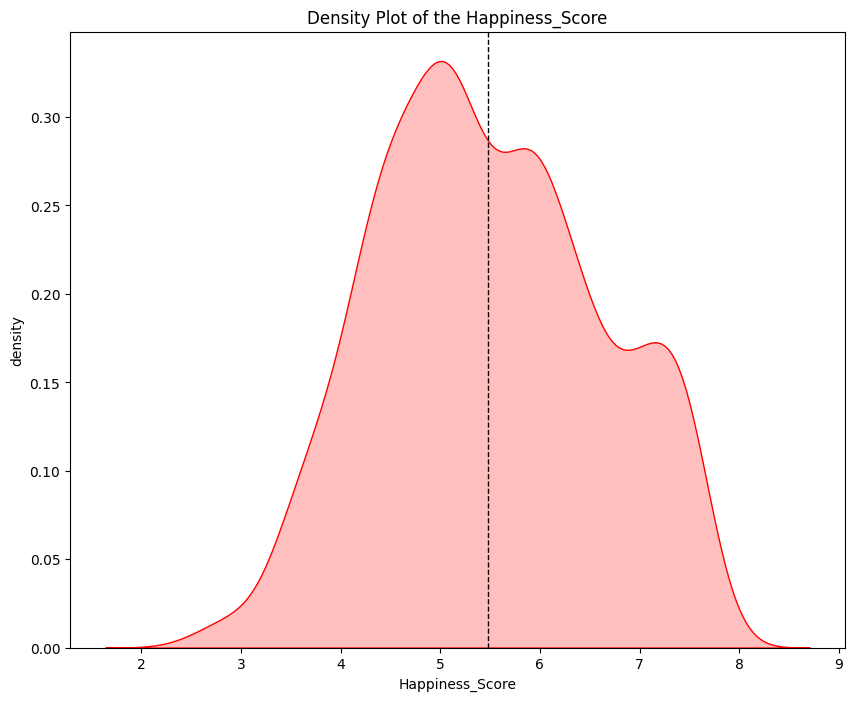

In [308]:
sns.kdeplot(df['Happiness_Score'], color='r', shade=True, label='HDI') 
plt.axvline(df['Happiness_Score'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel('Happiness_Score')
plt.ylabel('density')
plt.title('Density Plot of the Happiness_Score')

C:\Users\franc\AppData\Local\Temp\ipykernel_10652\2380169533.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Total_Alcohol'], color='r', shade=True, label='Beer')


Text(0.5, 1.0, 'Density Plot of Total_Alcohol consumption')

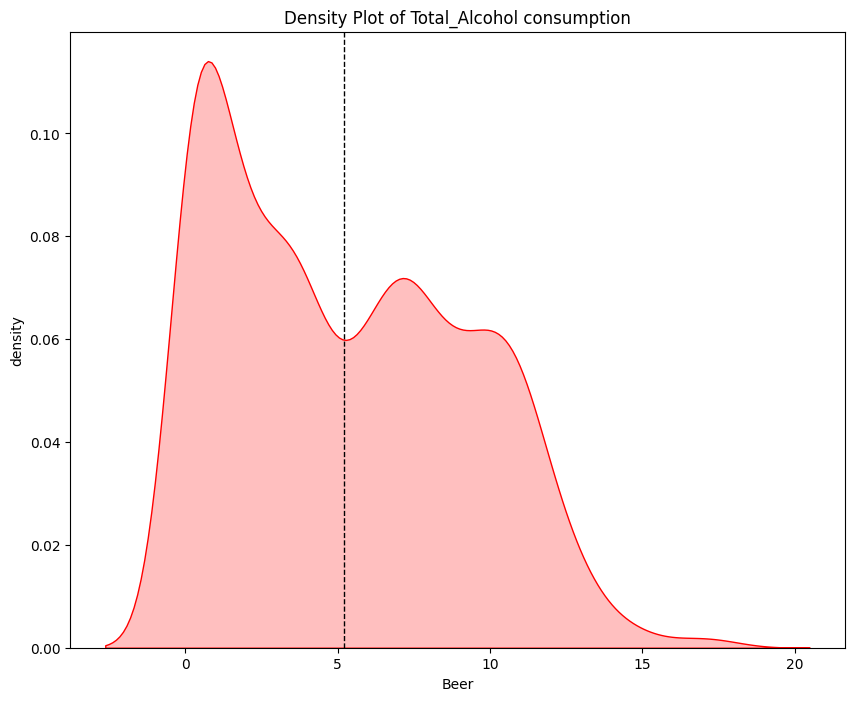

In [309]:
#density plot of the Beer consumption
sns.kdeplot(df['Total_Alcohol'], color='r', shade=True, label='Beer')
plt.axvline(df['Total_Alcohol'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel('Beer')
plt.ylabel('density')
plt.title('Density Plot of Total_Alcohol consumption')


In [310]:
df2019=df[df["Year"]==2019]

## Visualizzazione dei dati

Text(0.5, 1.0, 'Happiness Score vs Total alcohol')

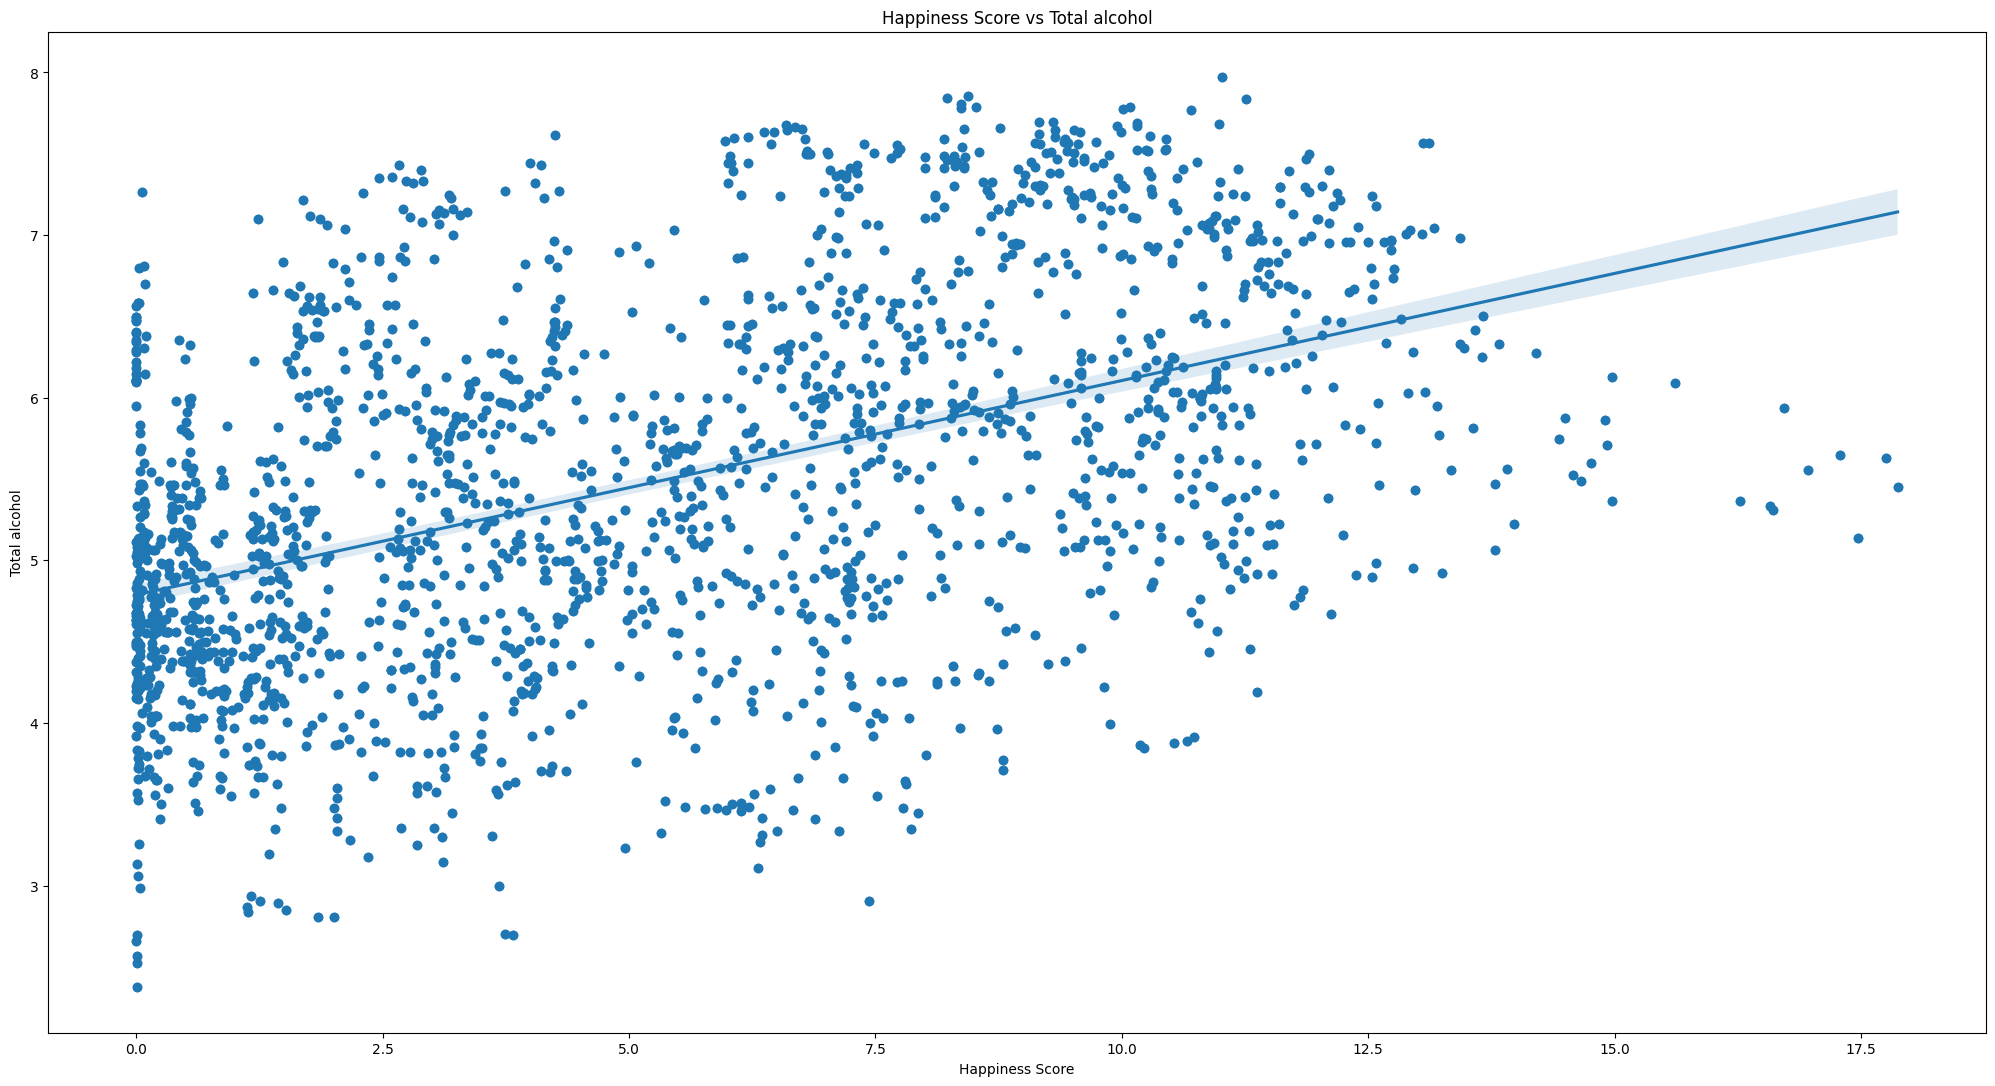

In [311]:
#plot a scatter plot of the Happiness score and the Total_alcohol
#plot a line of the linear regression with the distance of thepoints from the line
plt.rcParams['figure.figsize'] = (25, 13)
sns.regplot(y="Happiness_Score", x="Total_Alcohol", data=df)

plt.scatter(df["Total_Alcohol"],df["Happiness_Score"])
plt.xlabel("Happiness Score")
plt.ylabel("Total alcohol")
plt.title("Happiness Score vs Total alcohol")


<Axes: xlabel='GDP_per_capita', ylabel='Happiness_Score'>

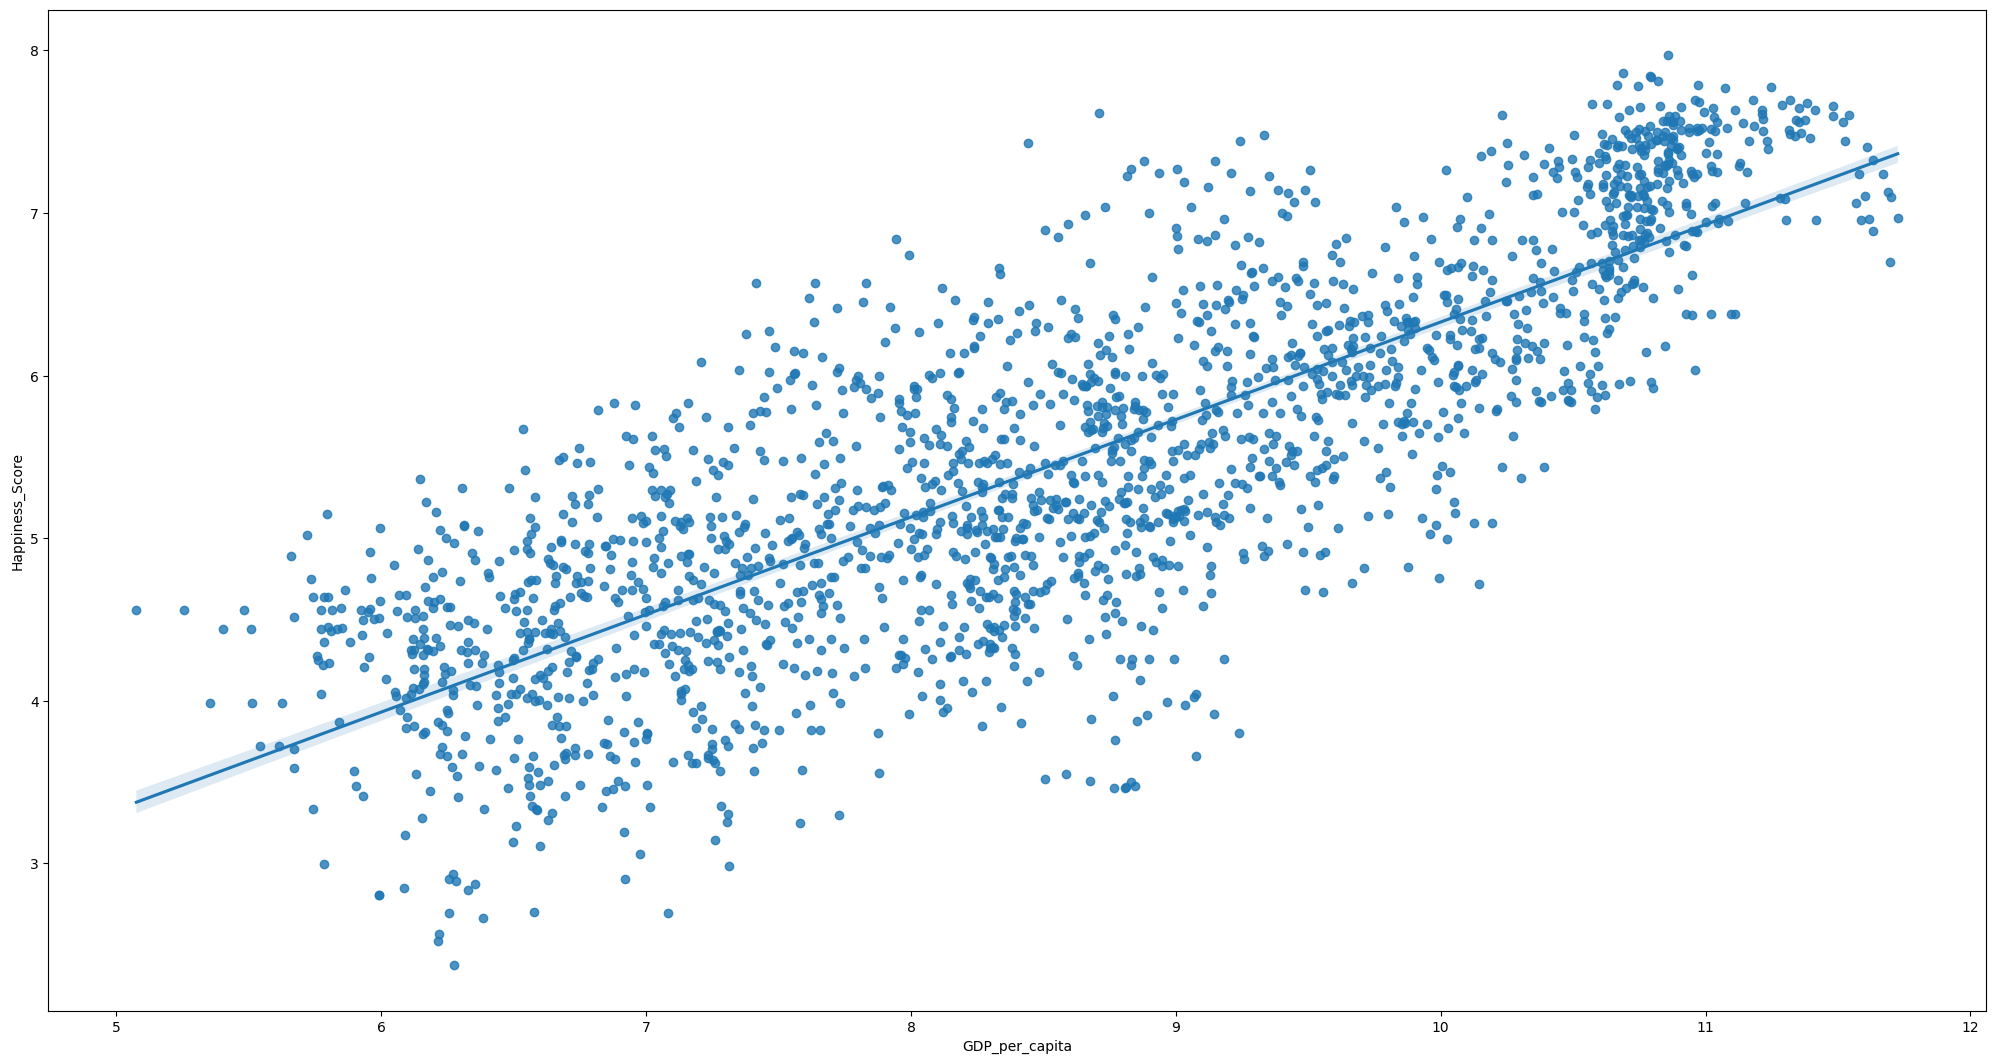

In [312]:
sns.regplot(y="Happiness_Score", x="GDP_per_capita", data=df)

<Axes: xlabel='HDI', ylabel='Happiness_Score'>

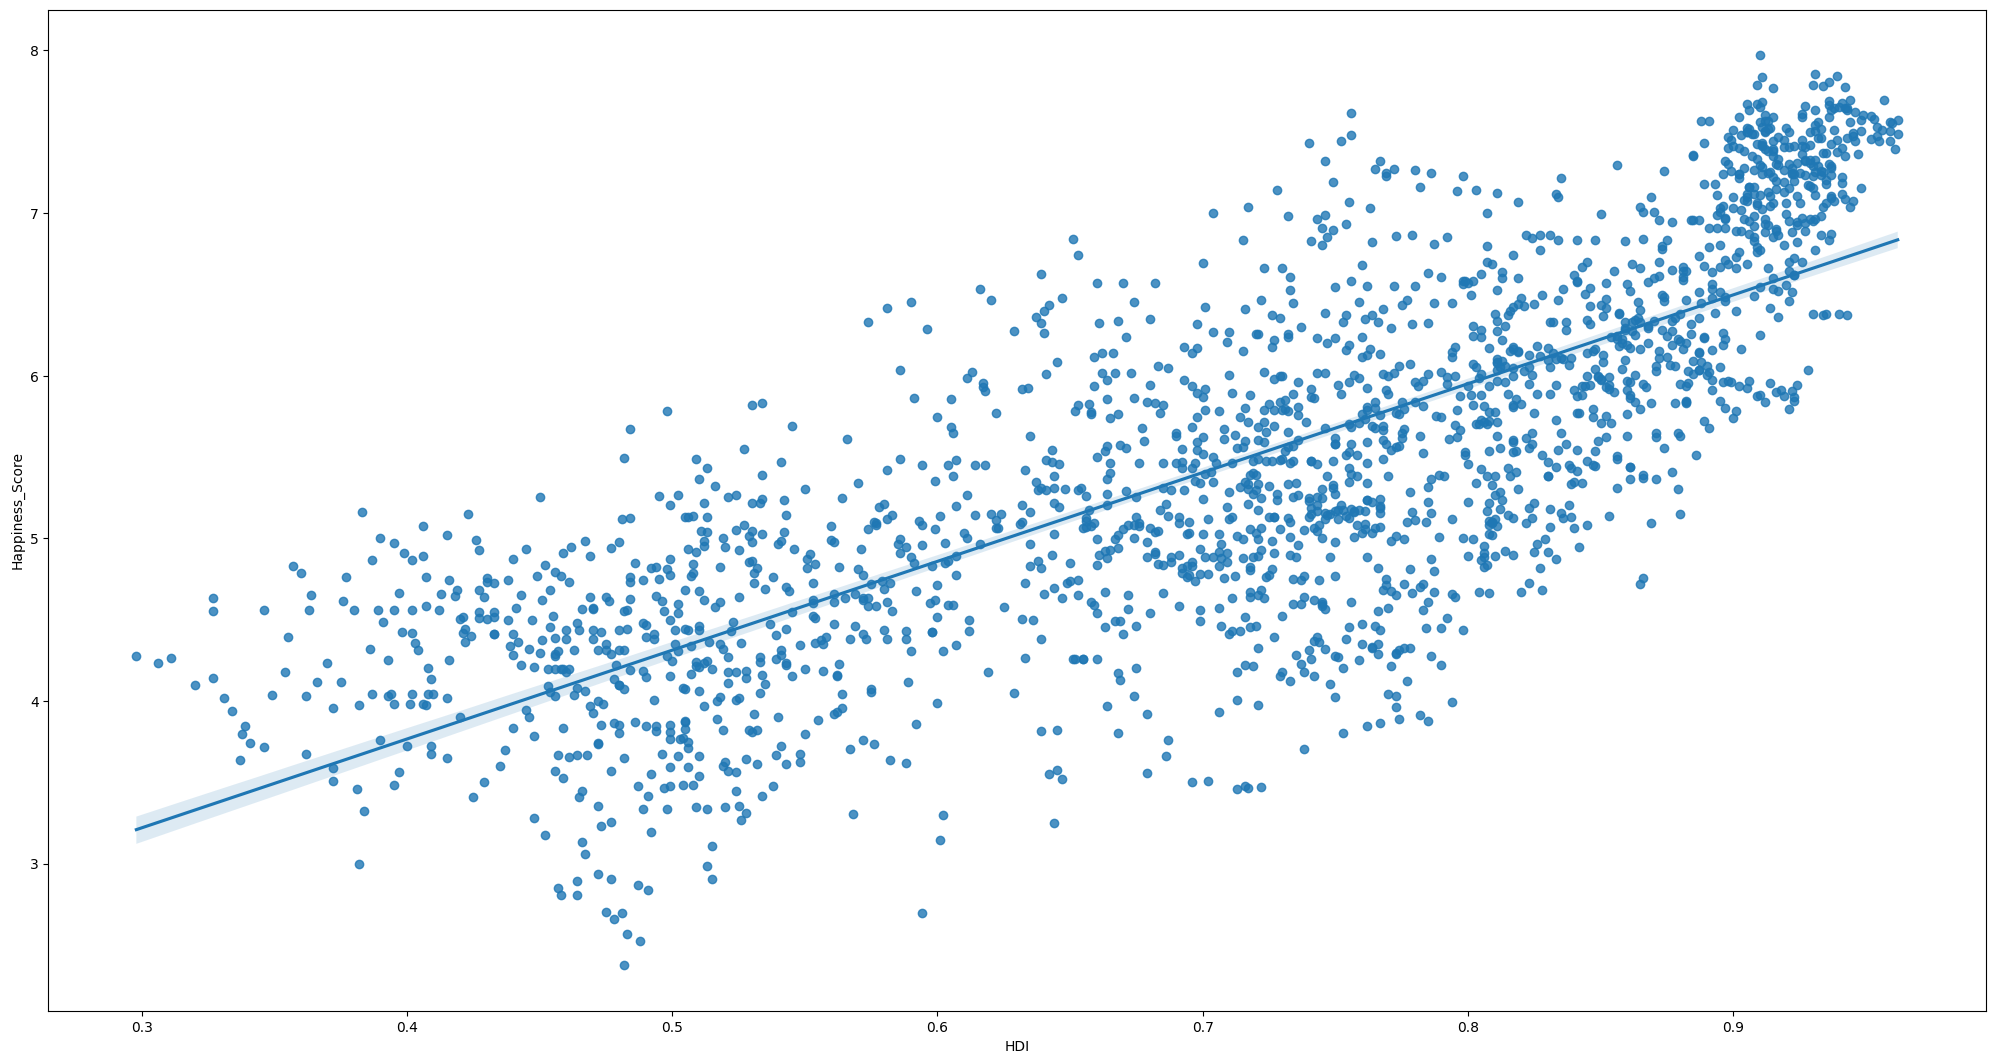

In [313]:
#plot a scatter plot of the Happiness score and the GDP_per_capita
#plot a line of the linear regression with the distance of thepoints from the line
sns.regplot(y="Happiness_Score", x="HDI", data=df)


<Axes: xlabel='Total_Alcohol', ylabel='Happiness_Score'>

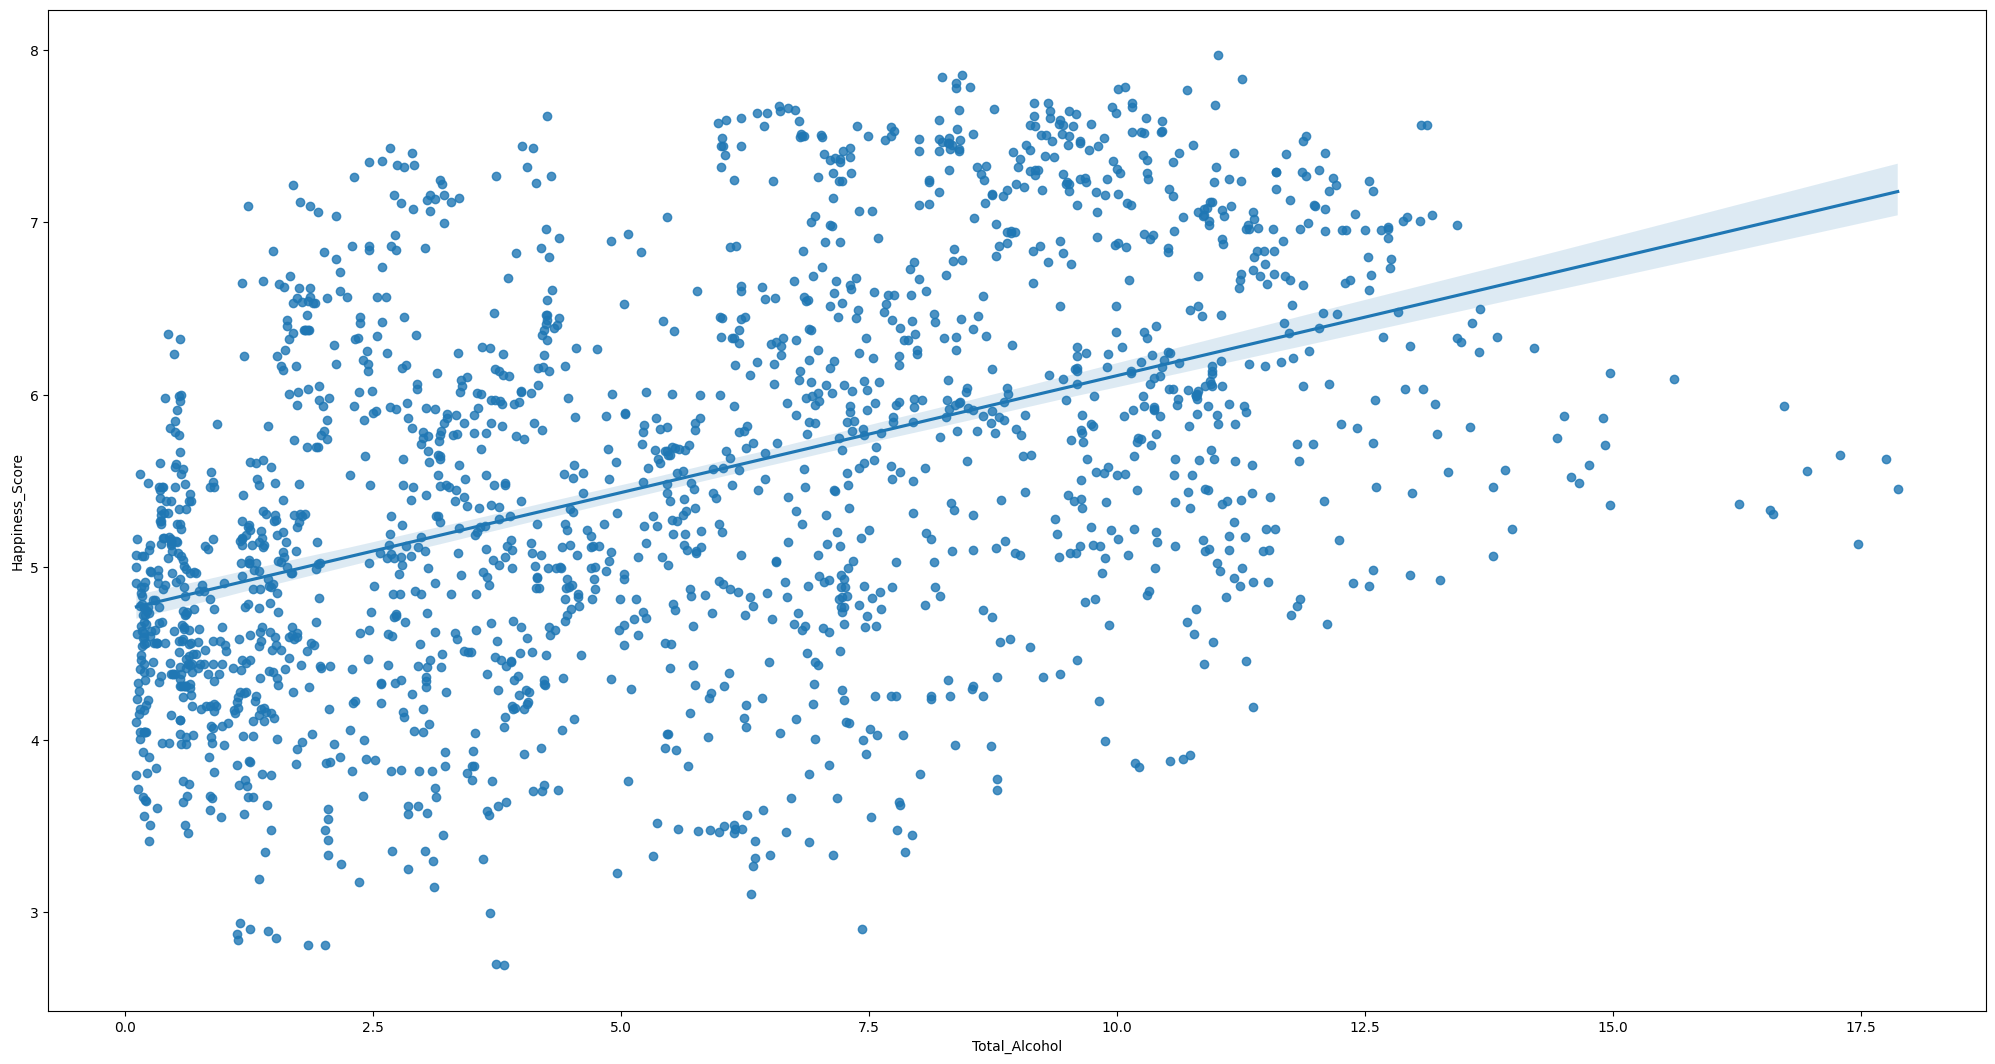

In [314]:
dfbis=df.copy()
dfbis=dfbis[dfbis["Total_Alcohol"]>0.1]
sns.regplot(y="Happiness_Score", x="Total_Alcohol", data=dfbis)


<Axes: xlabel='Total_Alcohol', ylabel='GDP_per_capita'>

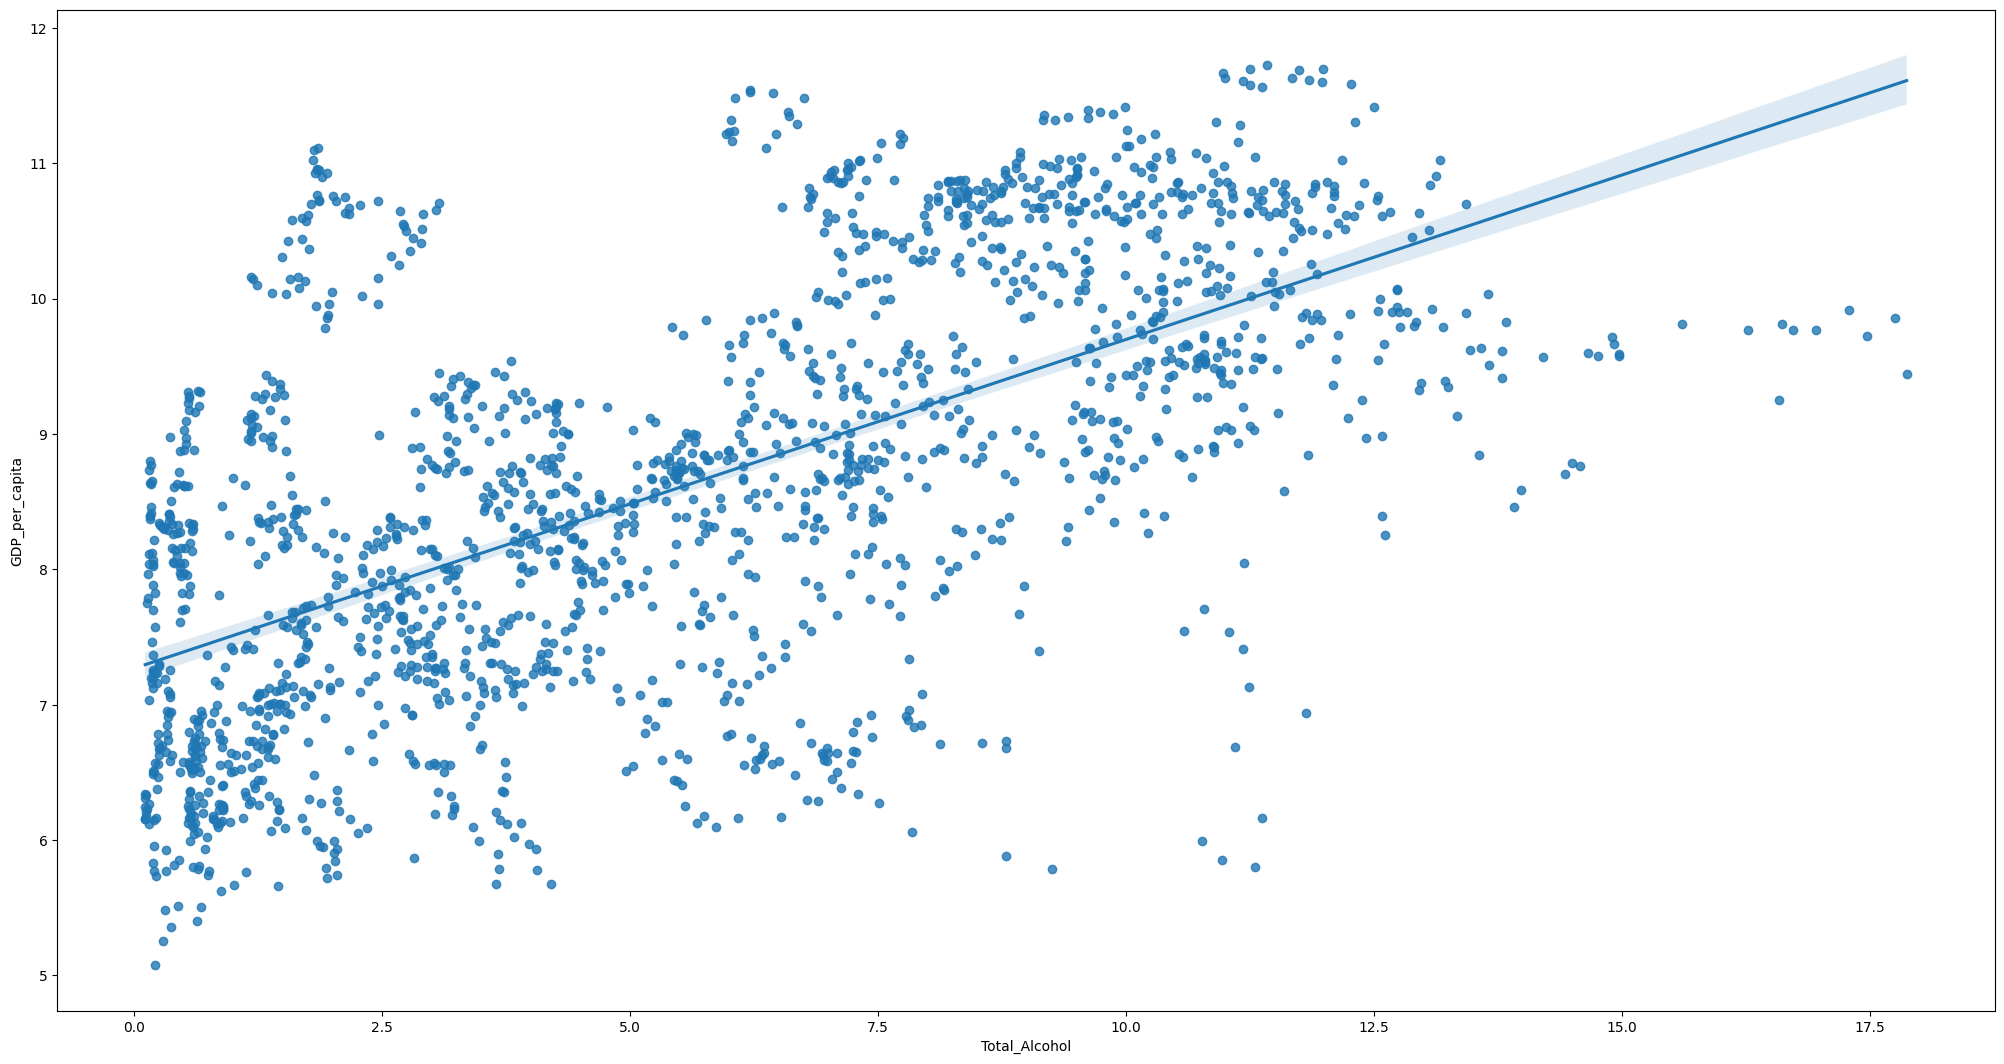

In [315]:
sns.regplot(y="GDP_per_capita", x="Total_Alcohol", data=dfbis)

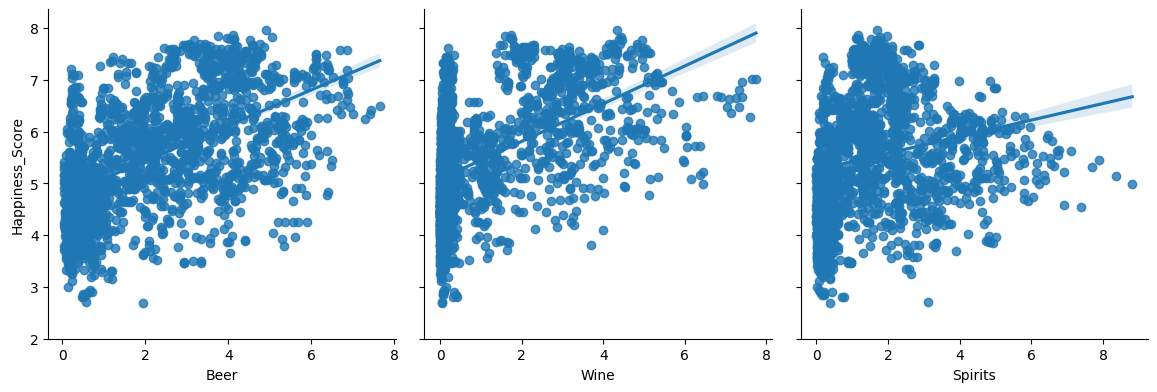

In [316]:
g = sns.PairGrid(dfbis, y_vars=["Happiness_Score"], x_vars=["Beer", "Wine","Spirits"], height=4)
g.map(sns.regplot)
g.set(yticks=[2,3,4,5,6,7,8])


C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


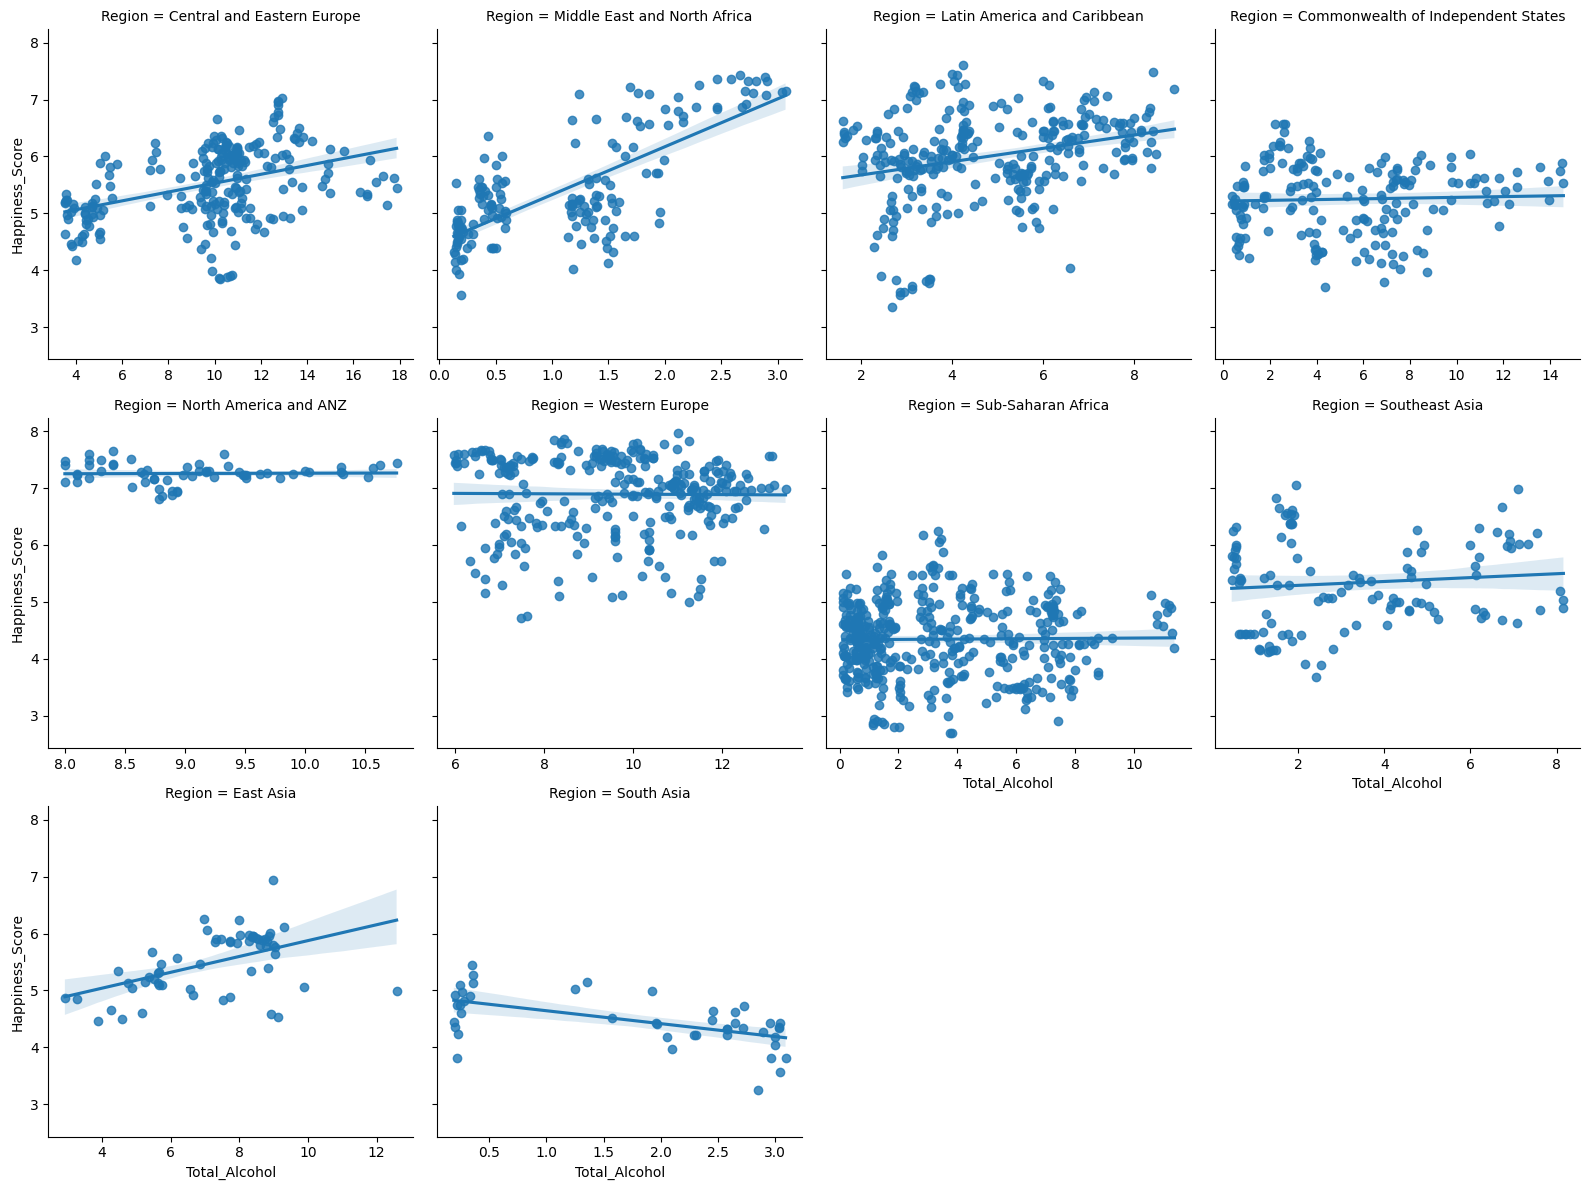

In [317]:
grid = sns.lmplot(y = "Happiness_Score", x= "Total_Alcohol", col = "Region", sharex=False, col_wrap = 4, data = dfbis, height=4)

C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


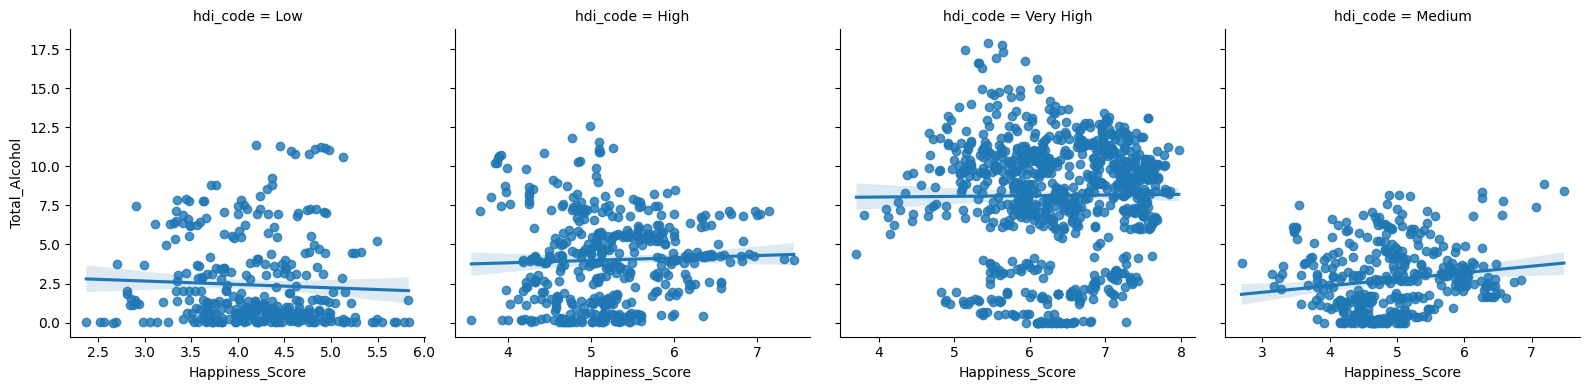

In [318]:
grid = sns.lmplot(x = "Happiness_Score", y = "Total_Alcohol", col = "hdi_code", sharex=False, col_wrap = 4, data = df, height=4)

In [319]:
#convert Year to npint
df["Year"]=df["Year"].astype(np.int64)

## Modelling 

In [320]:
X = df[["Beer","Wine","Spirits","GDP_per_capita","HDI"]]
y = df['Happiness_Score']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, test_size = 0.2)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.6203084985571907

In [321]:
df

,Entity,Region,Year,Happiness_Score,Beer,Wine,Spirits,GDP_per_capita,hdi_code,HDI,Total_Alcohol
0,Afghanistan,South Asia,2005,3.723590,0.00934,0.00084,0.00605,5.541480,Low,0.400,0.016
1,Afghanistan,South Asia,2006,3.723590,0.01147,0.00786,0.00685,5.613130,Low,0.409,0.026
2,Afghanistan,South Asia,2007,4.401778,0.00713,0.00887,0.00202,5.927134,Low,0.424,0.018
3,Afghanistan,South Asia,2008,4.758381,0.00857,0.00089,0.01809,5.960617,Low,0.430,0.028
4,Afghanistan,South Asia,2009,3.831719,0.00972,0.00000,0.00000,6.095476,Low,0.440,0.010
...,...,...,...,...,...,...,...,...,...,...,...
2035,Zimbabwe,Sub-Saharan Africa,2015,3.638300,1.93000,0.06000,0.36000,7.251578,Medium,0.582,3.840
2036,Zimbabwe,Sub-Saharan Africa,2016,3.616480,1.93000,0.05000,0.35000,7.259670,Medium,0.588,3.760
2037,Zimbabwe,Sub-Saharan Africa,2017,2.693523,1.93000,0.05000,0.39000,7.083478,Medium,0.594,3.820
2038,Zimbabwe,Sub-Saharan Africa,2018,3.299200,1.20000,0.04000,0.39000,7.727172,Medium,0.602,3.100


In [860]:
# Crea il modello ANOVA con effetti fissi per la regione geografica, la classe di sviluppo e l'anno
model = ols('Happiness_Score ~ Total_Alcohol +Region + hdi_code', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                   sum_sq      df           F         PR(>F)
Region         423.625813     9.0  127.189493  7.349029e-190
hdi_code       259.192949     3.0  233.460417  4.339644e-130
Total_Alcohol    3.689252     1.0    9.968954   1.615451e-03
Residual       749.770092  2026.0         NaN            NaN


In [834]:
X = df[["Total_Alcohol","HDI","GDP_per_capita"]]
y = df['Happiness_Score']

In [839]:
X2 = sm.add_constant(X)
model= sm.OLS(y, X2)
est2 = model.fit()
results_fr = model.fit_regularized(method='elastic_net', alpha=0.02, L1_wt=0,start_params=est2.params)
final = sm.regression.linear_model.OLSResults(model, 
                                              results_fr.params, 
                                              model.normalized_cov_params)
#print(est2.summary())
print(final.summary())


                            OLS Regression Results                            
Dep. Variable:        Happiness_Score   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     1297.
Date:                Wed, 02 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:54:20   Log-Likelihood:                -2051.2
No. Observations:                2040   AIC:                             4110.
Df Residuals:                    2036   BIC:                             4133.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1852      0.097      1.

In [872]:
X = df[["Total_Alcohol"]]
y = df['GDP_per_capita']
X2 = sm.add_constant(X)
model= sm.OLS(y, X2)
est2 = model.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         GDP_per_capita   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     1180.
Date:                Thu, 03 Aug 2023   Prob (F-statistic):          2.16e-204
Time:                        15:44:45   Log-Likelihood:                -3286.7
No. Observations:                2040   AIC:                             6577.
Df Residuals:                    2038   BIC:                             6589.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.3765      0.044    167.299

In [843]:
X = df[["Total_Alcohol"]]
y = df['Happiness_Score']
X2 = sm.add_constant(X)
model= sm.OLS(y, X2)
est2 = model.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness_Score   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     572.1
Date:                Wed, 02 Aug 2023   Prob (F-statistic):          1.20e-111
Time:                        13:28:29   Log-Likelihood:                -2888.7
No. Observations:                2040   AIC:                             5781.
Df Residuals:                    2038   BIC:                             5793.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.7884      0.036    131.997

In [841]:
X = df[["Total_Alcohol","HDI","GDP_per_capita"]]
#X = df[["Beer","Wine","Spirits"]]
y = df['Happiness_Score']

In [842]:
X2 = sm.add_constant(X)
model= sm.OLS(y, X2)
est2 = model.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness_Score   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     1312.
Date:                Wed, 02 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:27:38   Log-Likelihood:                -2043.5
No. Observations:                2040   AIC:                             4095.
Df Residuals:                    2036   BIC:                             4118.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3831      0.097      3.

In [874]:
formula="Happiness_Score ~ C(Region) + Total_Alcohol + HDI + GDP_per_capita"
model= sm.OLS.from_formula(formula, data=df)
est2 = model.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness_Score   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     470.4
Date:                Thu, 03 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:39:53   Log-Likelihood:                -1783.5
No. Observations:                2040   AIC:                             3593.
Df Residuals:                    2027   BIC:                             3666.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [866]:
# Test di ipotesi simultaneo
hypothesis_0 = "Total_Alcohol=0 , HDI=0,GDP_per_capita=0"
test = est2.wald_test(hypothesis_0)

# Stampa i risultati del test
print(test)

<F test: F=array([[1311.89079024]]), p=0.0, df_denom=2.04e+03, df_num=3>


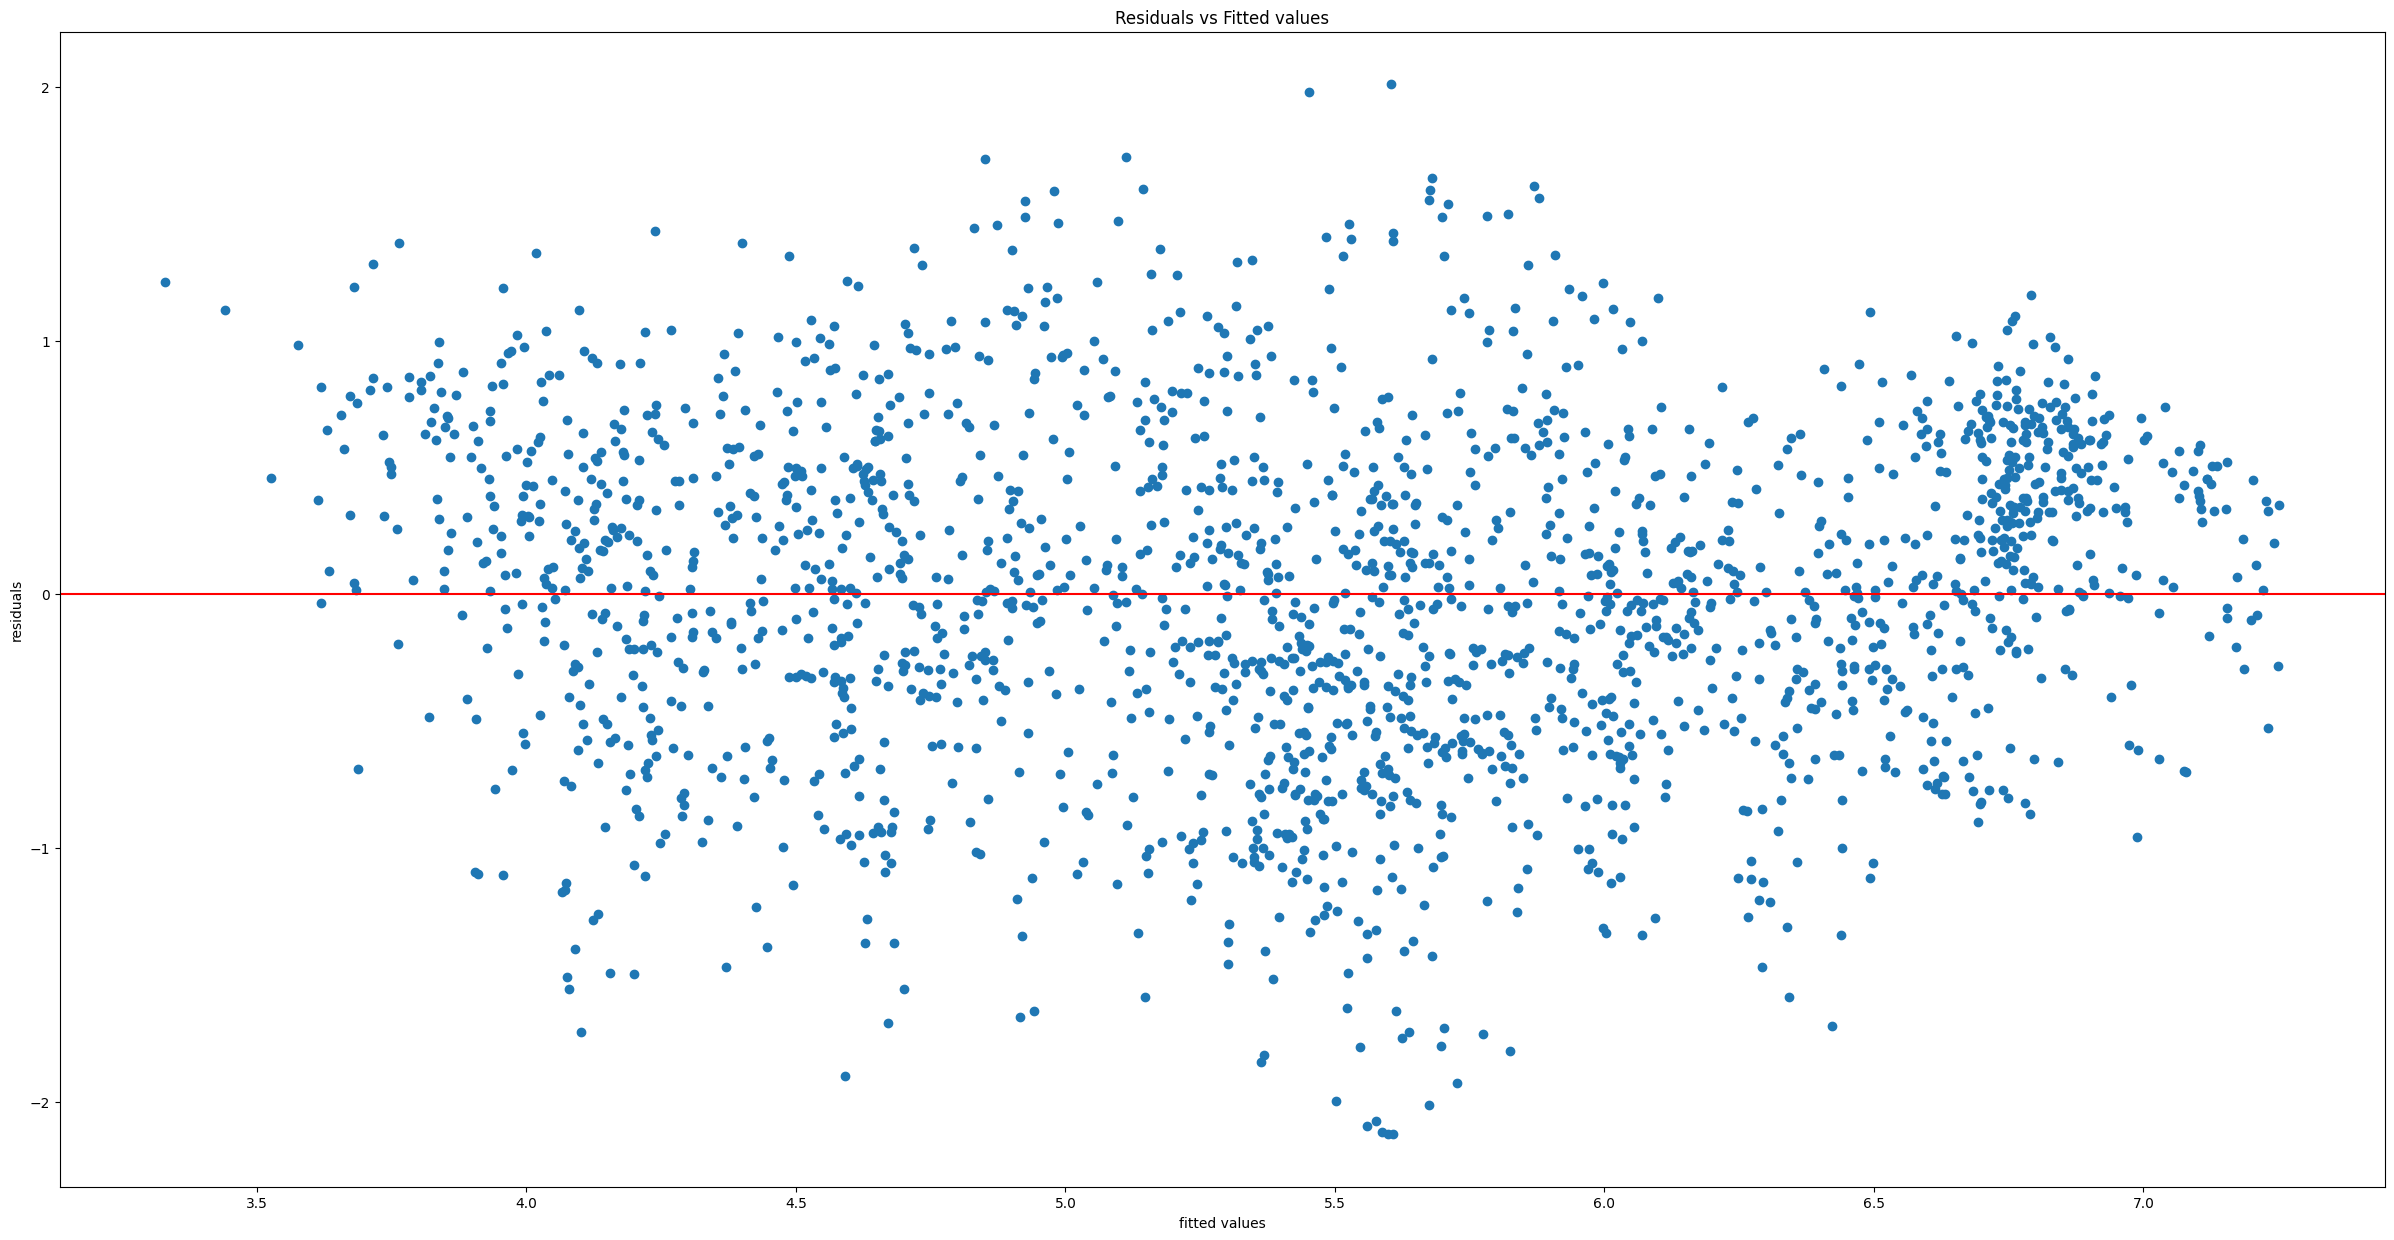

In [ ]:
#plot the residual of the model
plt.scatter(final.fittedvalues, final.resid)
#add the size of the plot
plt.rcParams['figure.figsize'] = [30, 15]
plt.xlabel("fitted values")
plt.ylabel("residuals")
plt.title("Residuals vs Fitted values")
#add a line at 0
plt.axhline(y=0, color='r', linestyle='-')


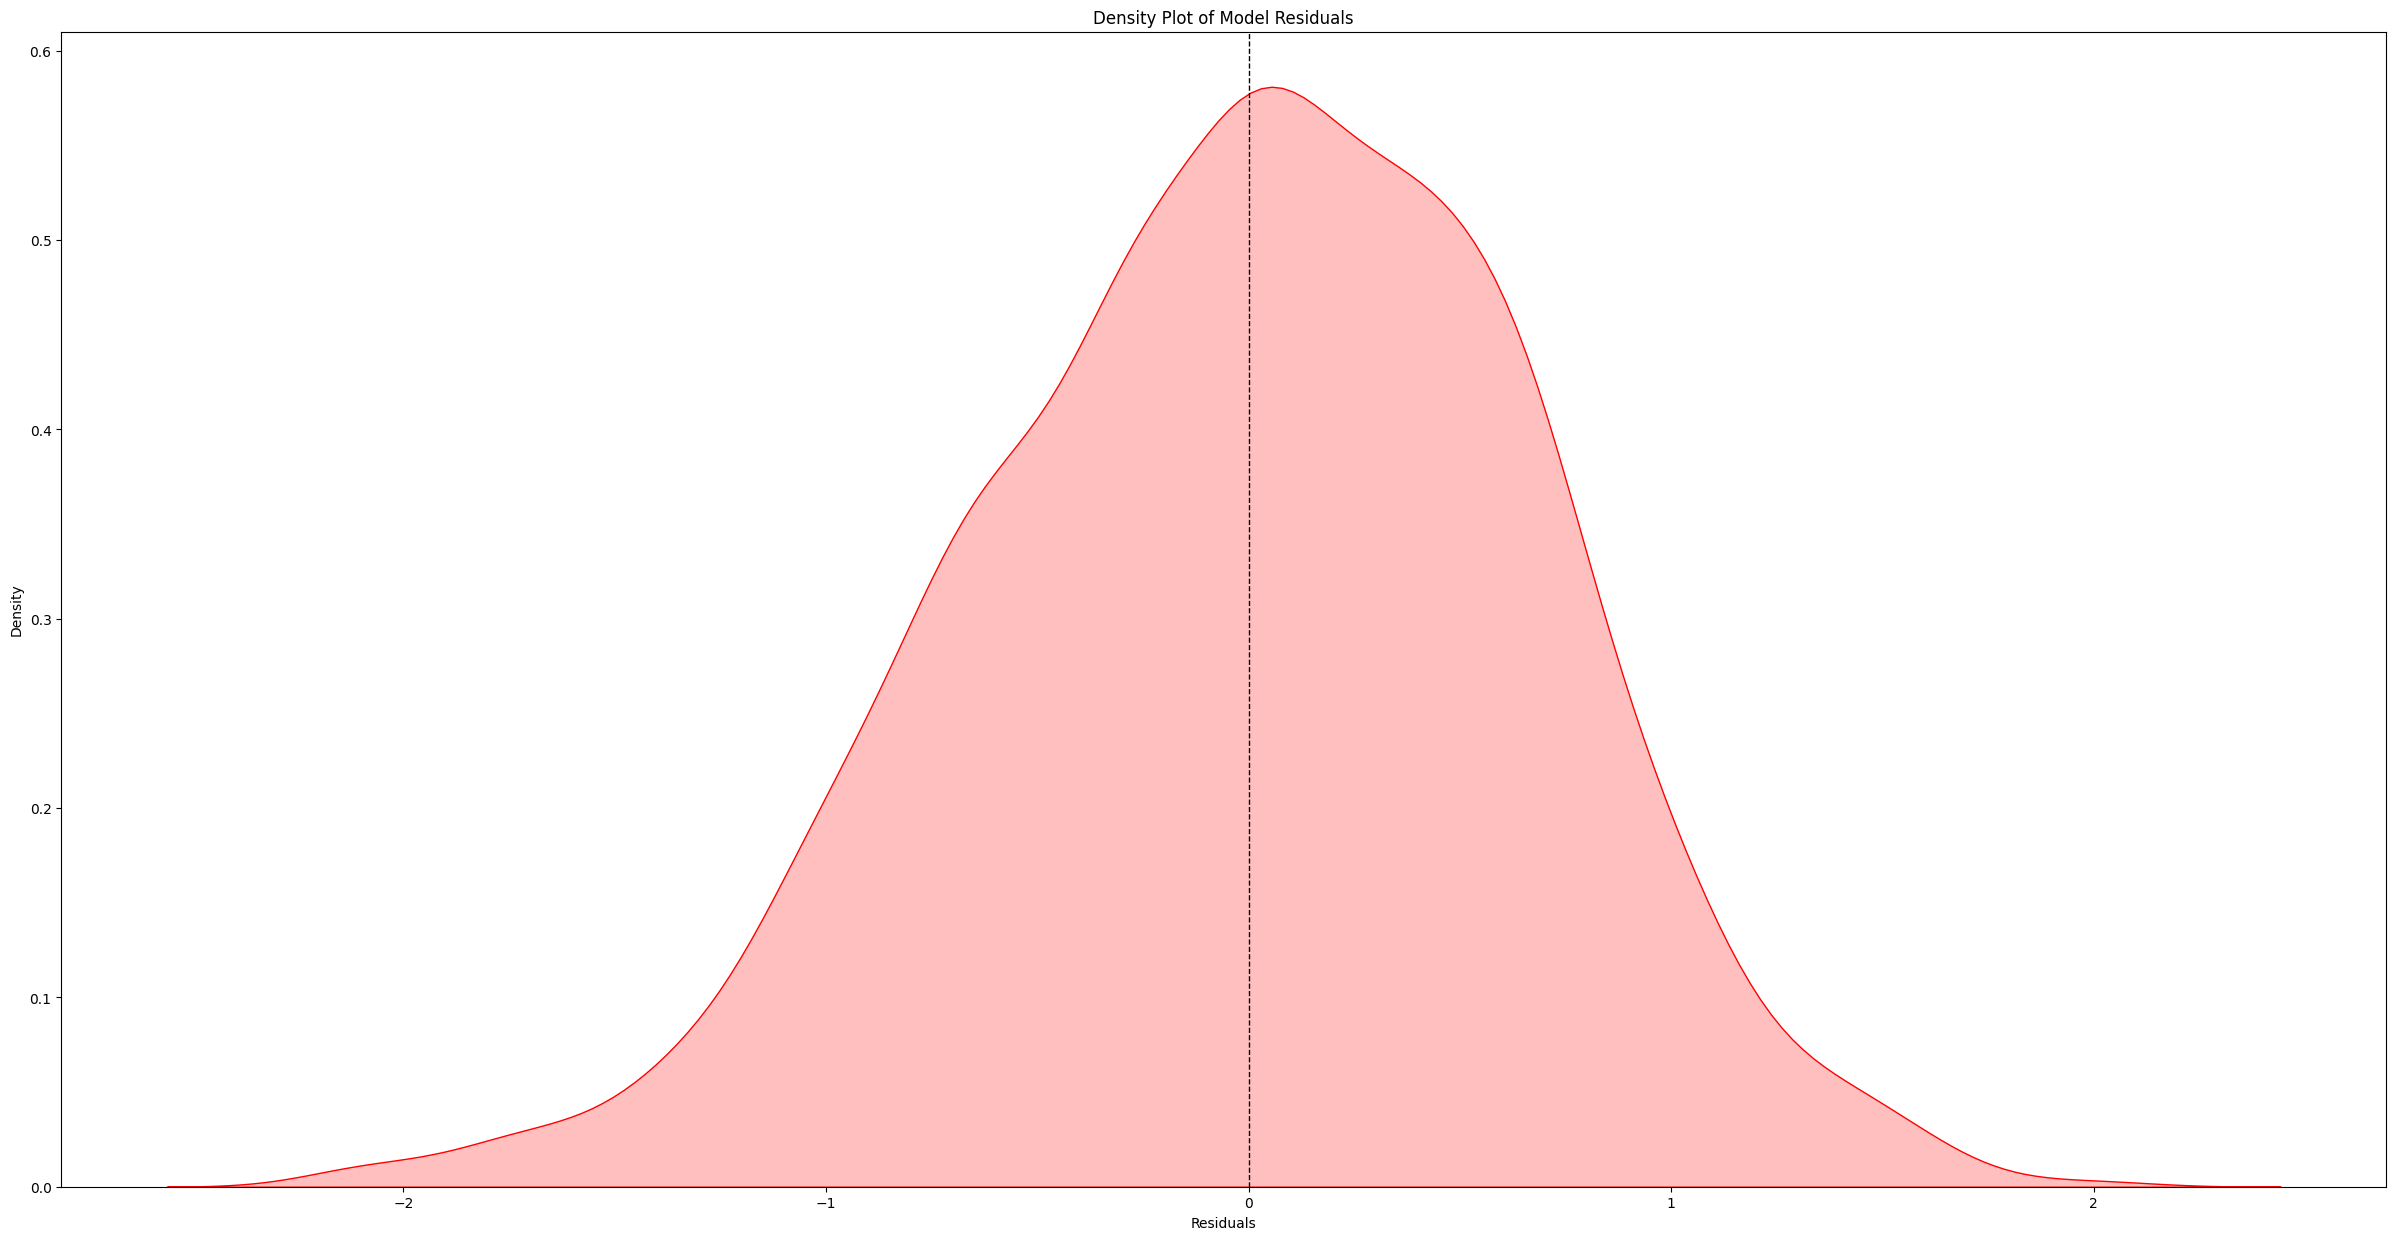

In [ ]:
#KDE Plot of Model Residuals
sns.kdeplot(final.resid, color='r', fill=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Density Plot of Model Residuals')
#plot the normal distribution line
plt.axvline(final.resid.mean(), color='k', linestyle='dashed', linewidth=1)

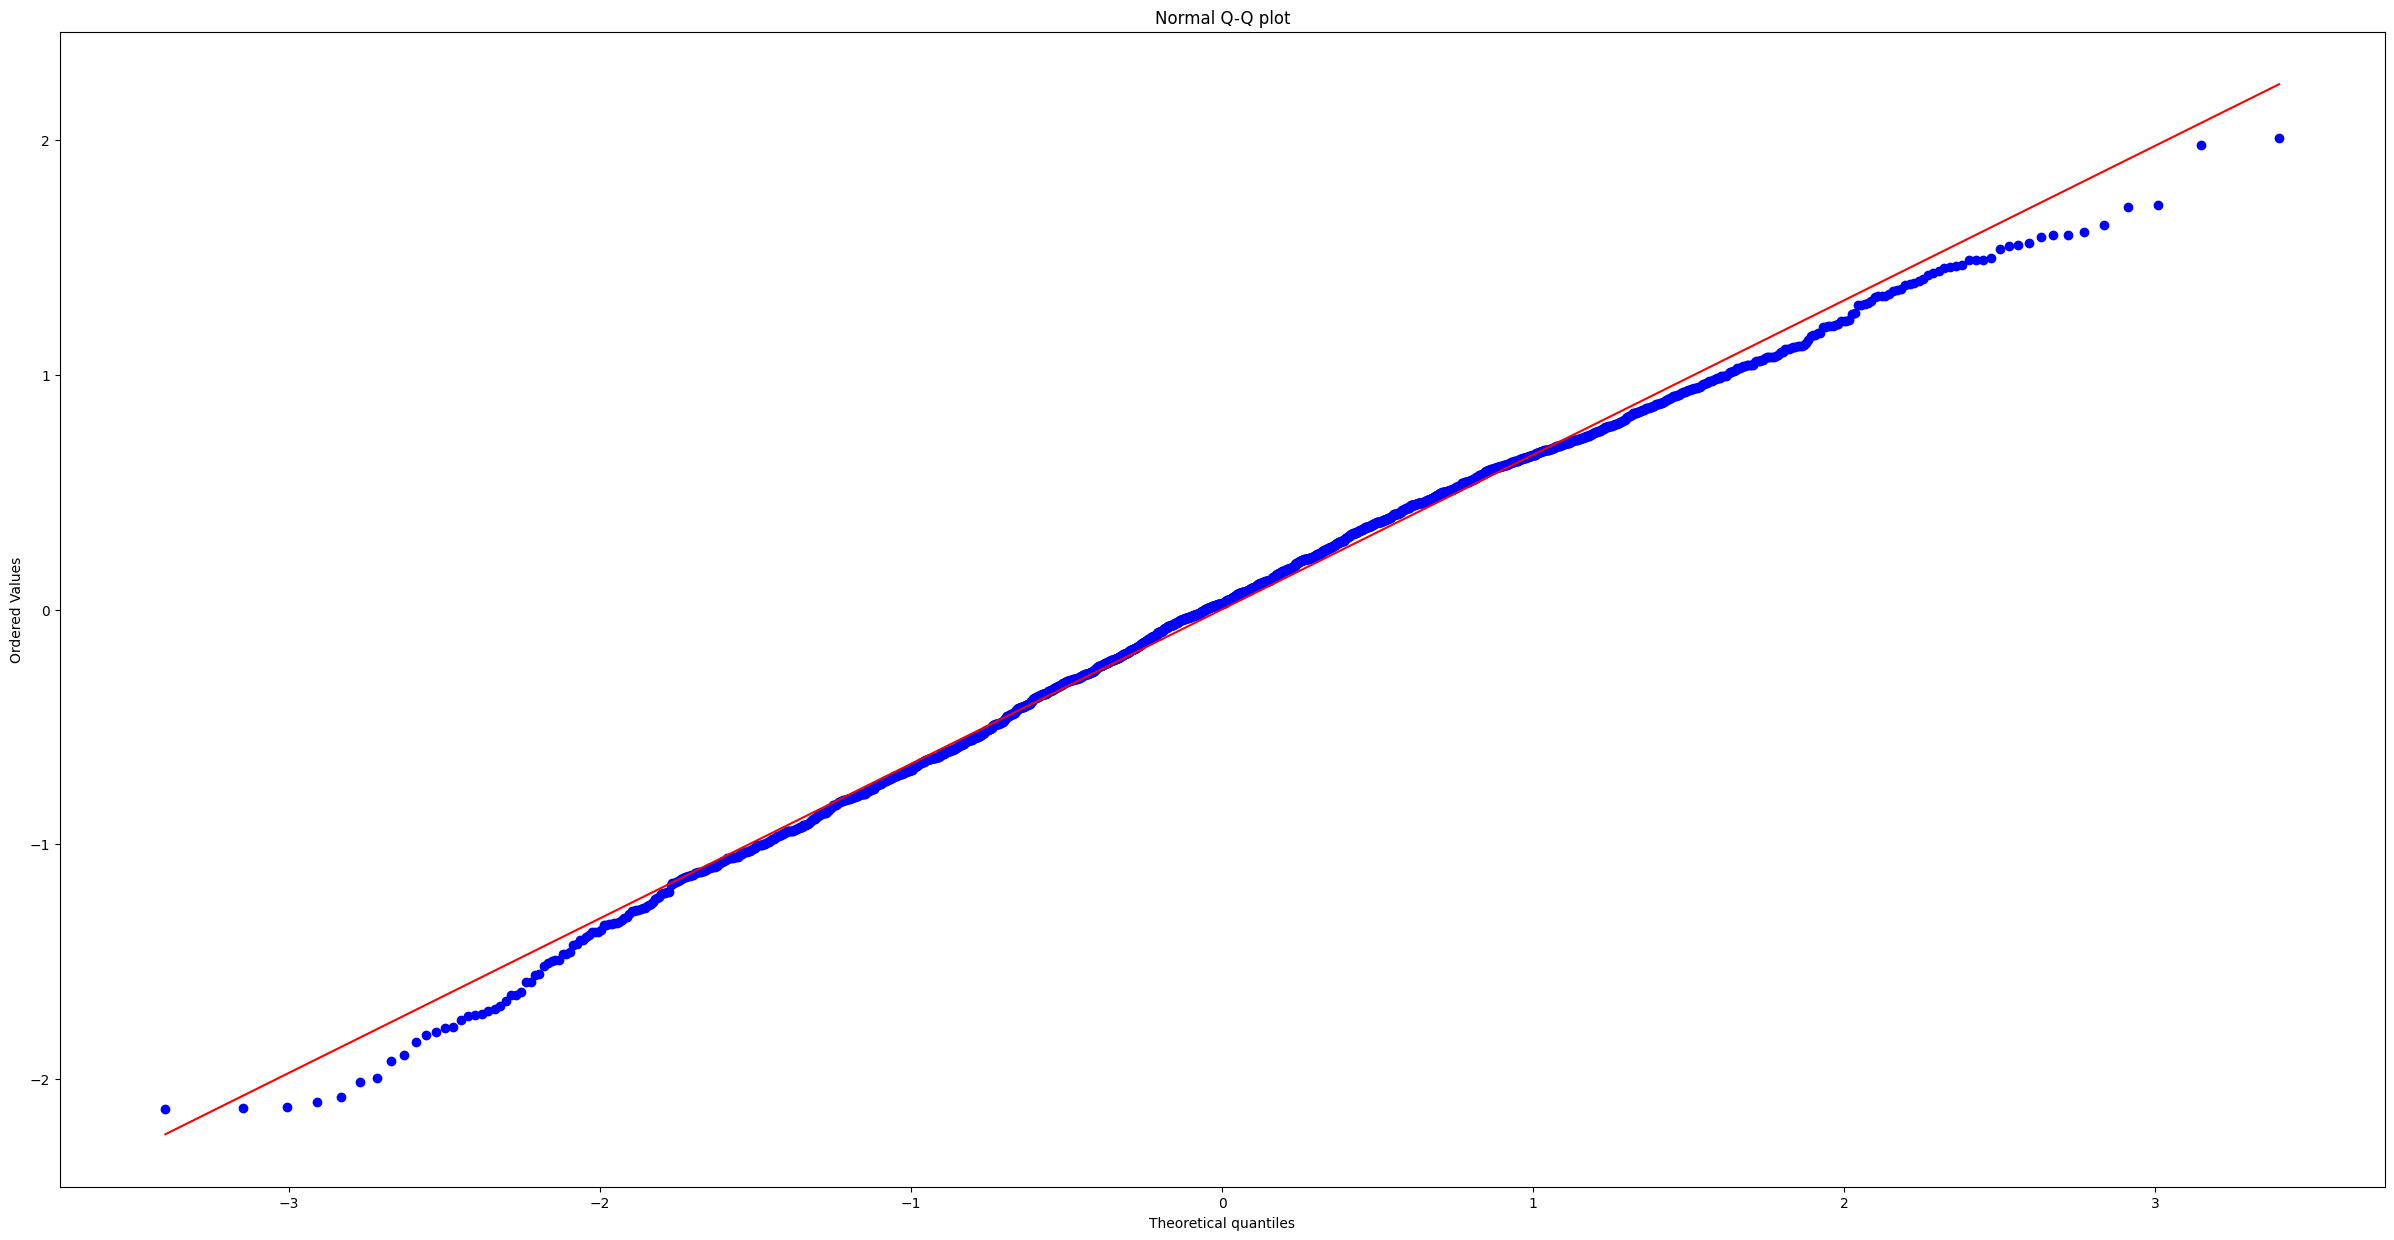

In [ ]:
#plot Q-Q Plot
stats.probplot(final.resid, dist="norm", plot=pylab)
plt.title("Normal Q-Q plot")
plt.show()


In [ ]:
modelvar = VAR(df[['Happiness_Score','Total_Alcohol','HDI']])
model_fit=modelvar.fit()
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 29, Jul, 2023
Time:                     20:01:01
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -7.04484
Nobs:                     2039.00    HQIC:                  -7.06578
Log likelihood:          -1451.71    FPE:                0.000843528
AIC:                     -7.07792    Det(Omega_mle):     0.000838583
--------------------------------------------------------------------
Results for equation Happiness_Score
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.521661         0.060310            8.650           0.000
L1.Happiness_Score         0.826951         0.015851           52.169           0.000
L1.Total_Alcohol          -0.0

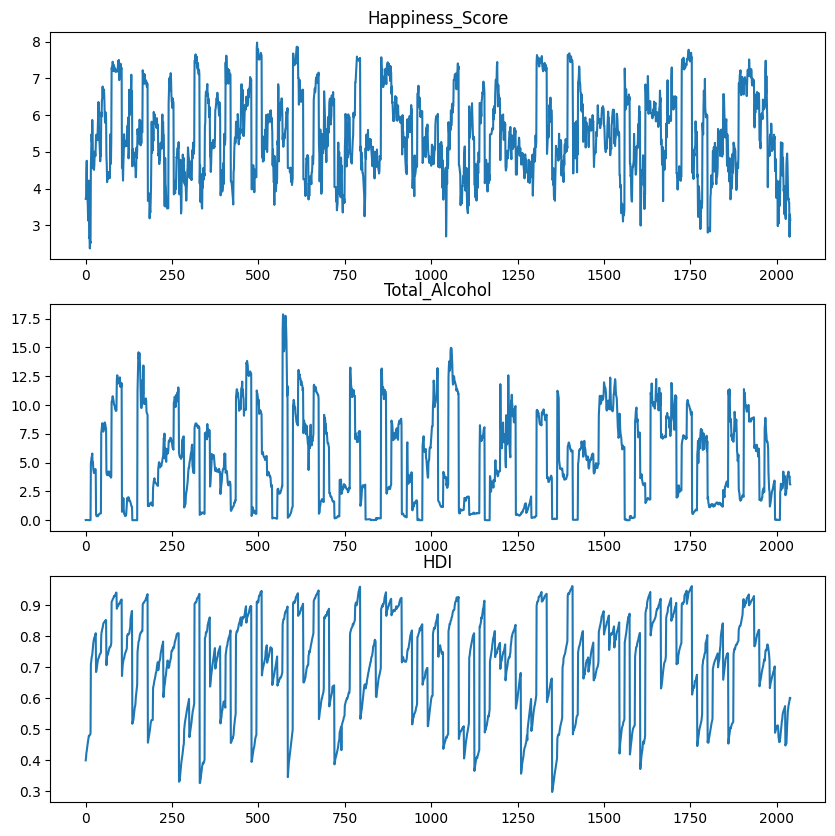

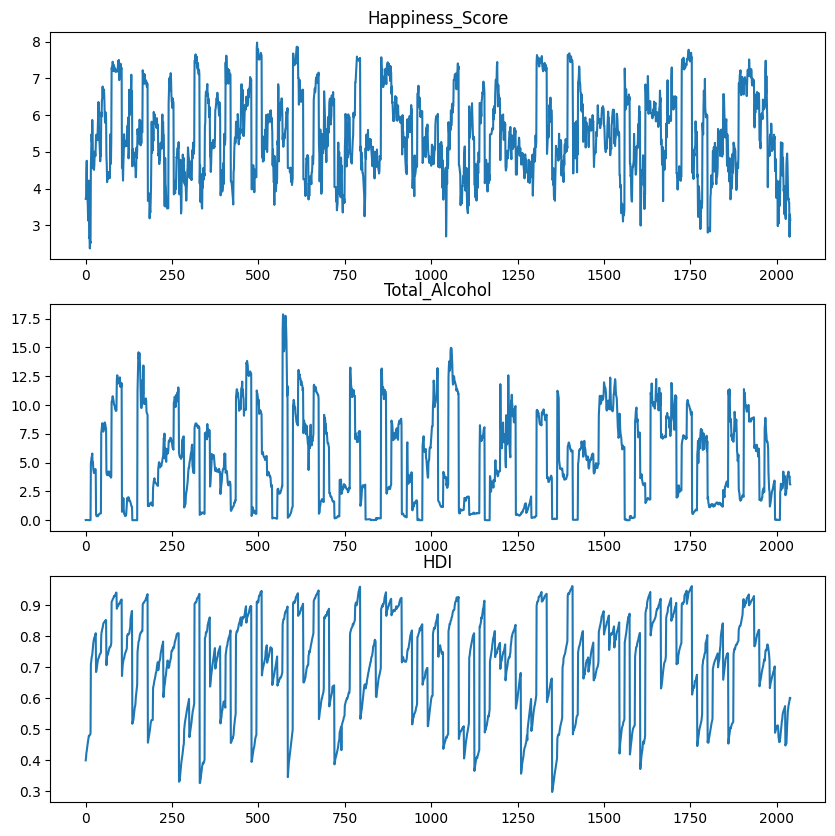

In [ ]:
model_fit.plot()

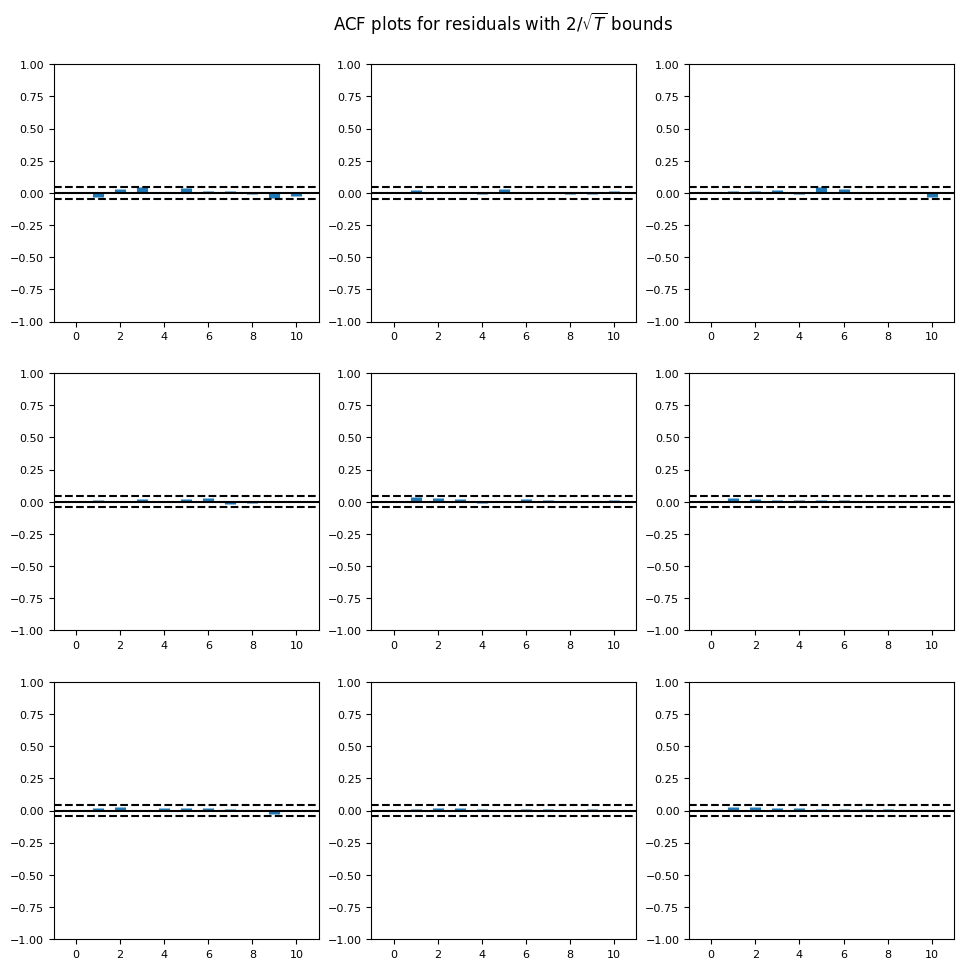

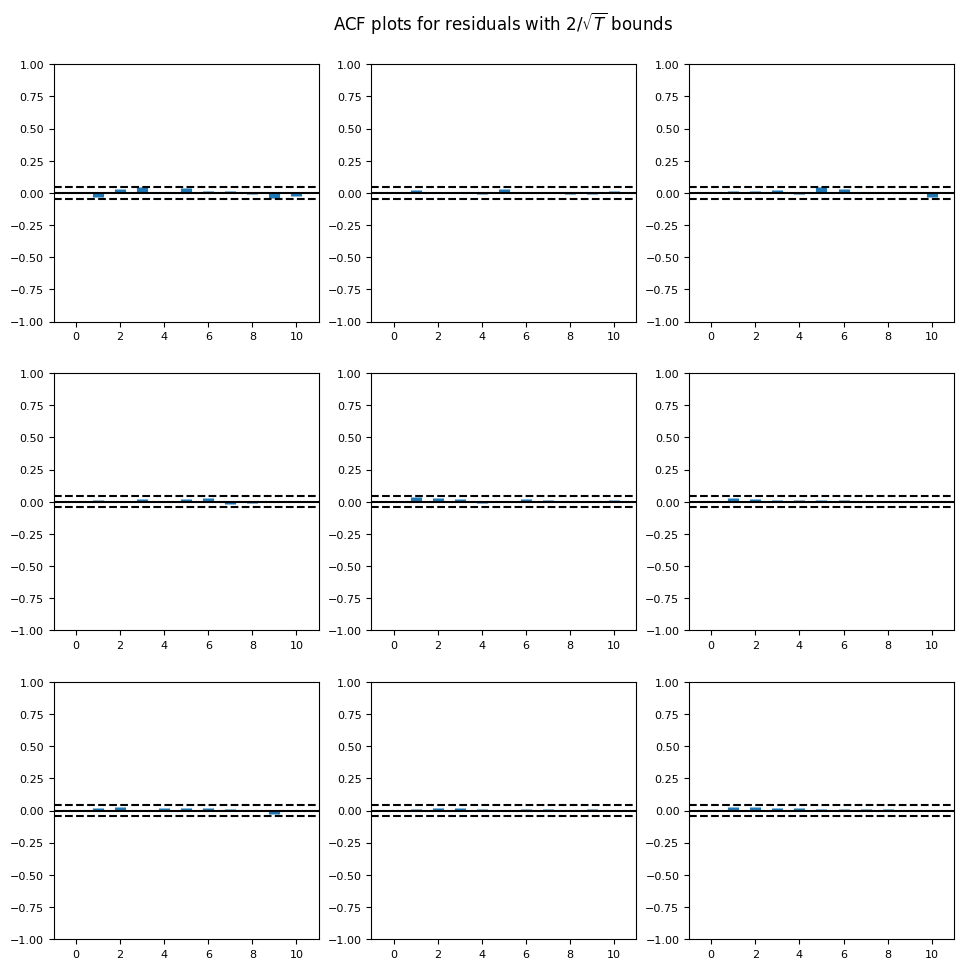

In [ ]:
model_fit.plot_acorr()

In [ ]:
# fit model
model = ARIMA(df[['Year','Happiness_Score','Total_Alcohol','HDI']], order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())